In [ ]:
%pip install xarray netCDF4dd pandas seaborn scikit-learn

In [1]:
import pandas as pd

# Define the path to the CSV file in the Colab environment
file_path = 'Whale shark movements in Gulf of Mexico.csv'

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("CSV file loaded successfully!")

    # Keep only the specified columns
    df = df[['timestamp', 'location-long', 'location-lat', 'individual-local-identifier']].copy()

    # Add the new 'shark_name' column
    df['shark_name'] = 'whale_shark'

    # Display the first few rows of the modified dataframe
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please make sure the file is uploaded to your Colab environment.")
except Exception as e:
    print(f"An error occurred: {e}")

CSV file loaded successfully!


,timestamp,location-long,location-lat,individual-local-identifier,shark_name
0,2014-07-10 00:00:00.000,-90.905000,28.054000,45101,whale_shark
1,2014-07-11 00:00:00.000,-91.150922,26.707780,45101,whale_shark
2,2014-07-12 00:00:00.000,-91.194314,26.693058,45101,whale_shark
3,2014-07-13 00:00:00.000,-91.434551,26.718662,45101,whale_shark
4,2014-07-14 00:00:00.000,-91.667210,26.878502,45101,whale_shark


DATASET OVERVIEW
Total records: 3382
Date range: 2009-06-11 to 2015-07-11
Number of unique sharks: 41

First few rows:
   timestamp  location-long  location-lat  individual-local-identifier  \
0 2014-07-10     -90.905000     28.054000                        45101   
1 2014-07-11     -91.150922     26.707780                        45101   
2 2014-07-12     -91.194314     26.693058                        45101   
3 2014-07-13     -91.434551     26.718662                        45101   
4 2014-07-14     -91.667210     26.878502                        45101   

    shark_name        date  
0  whale_shark  2014-07-10  
1  whale_shark  2014-07-11  
2  whale_shark  2014-07-12  
3  whale_shark  2014-07-13  
4  whale_shark  2014-07-14  


SHARK TRACKING SUMMARY
 Shark_ID First_Seen  Last_Seen  Total_Records  Tracking_Days
    45101 2014-07-10 2014-10-17            100            100
    77007 2009-06-11 2009-08-01             52             52
    85224 2009-06-11 2009-10-18            130     

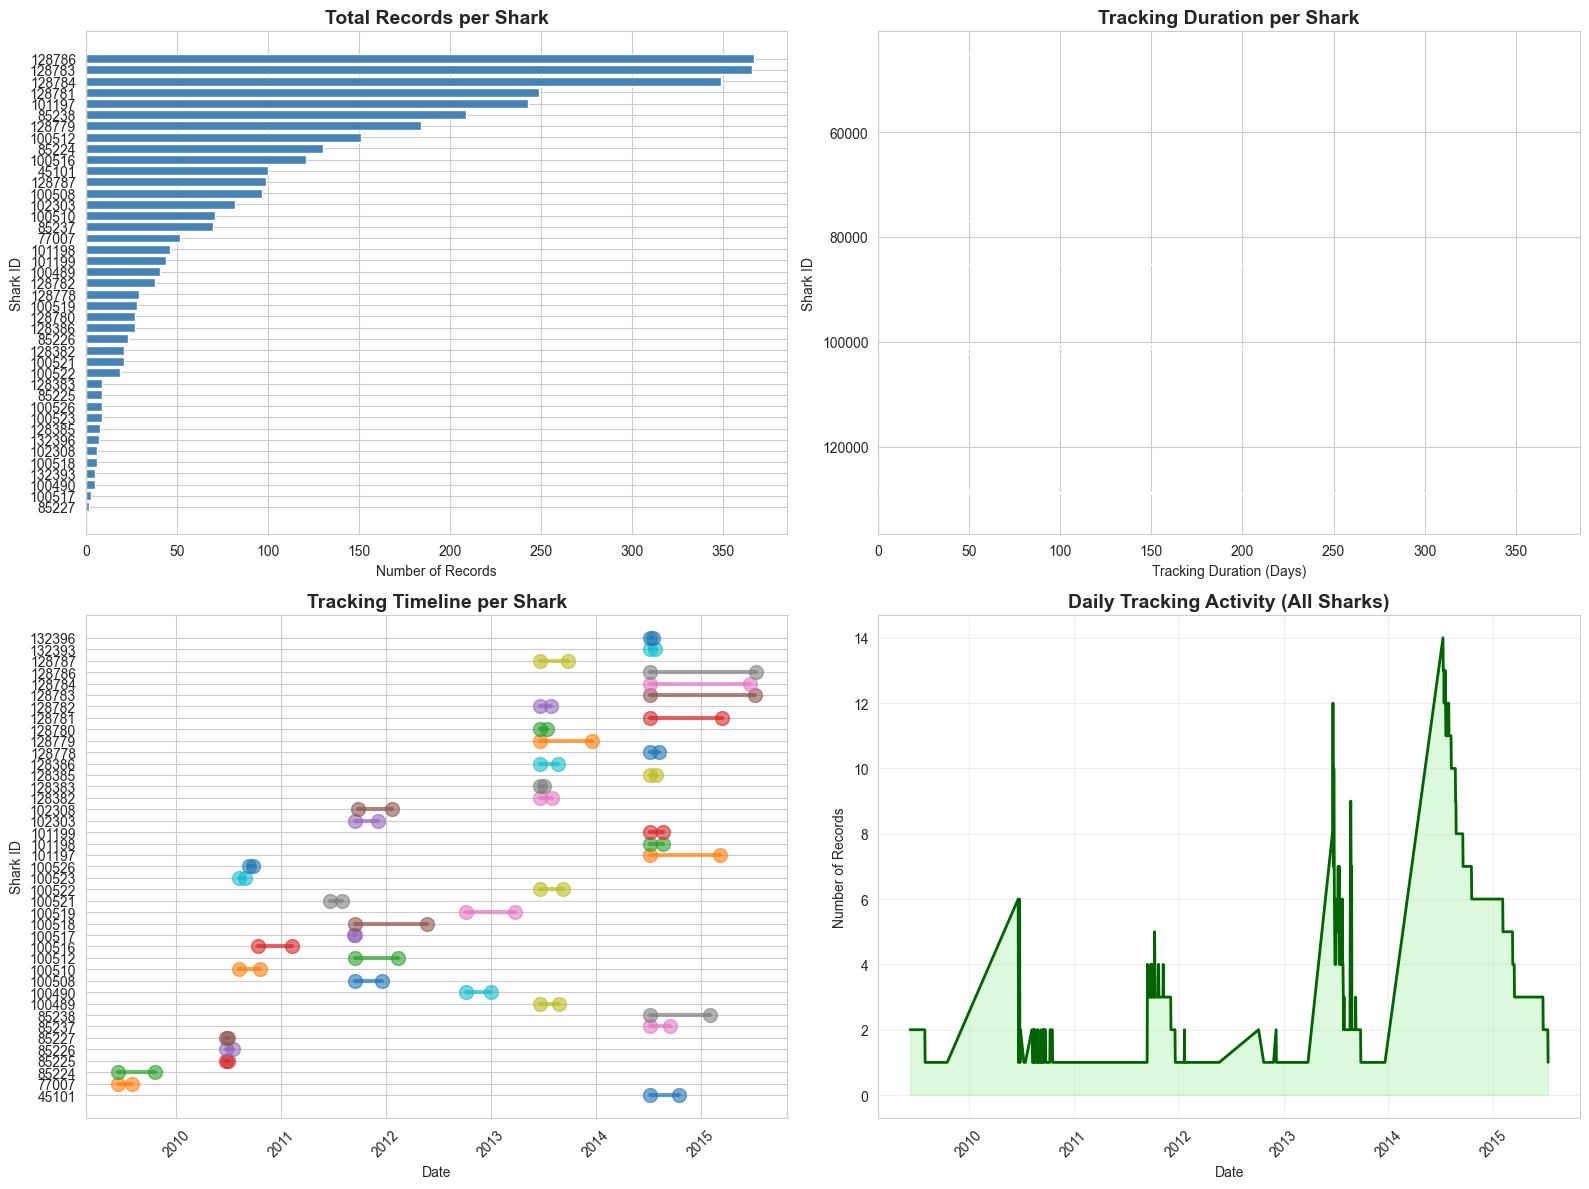

TEMPORAL PATTERNS

Records per Month:
 year  month  count
 2009      6     40
 2009      7     62
 2009      8     32
 2009      9     30
 2009     10     18
 2010      6     28
 2010      7      6
 2010      8     31
 2010      9     39
 2010     10     40
 2010     11     30
 2010     12     31
 2011      1     31
 2011      2      8
 2011      6      9
 2011      7     12
 2011      9     54
 2011     10     99
 2011     11     91
 2011     12     56
 2012      1     32
 2012      2     12
 2012      5      1
 2012     10      5
 2012     11      6
 2012     12     11
 2013      1      2
 2013      2      8
 2013      3      1
 2013      6     80
 2013      7    154
 2013      8     93
 2013      9     57
 2013     10     31
 2013     11     30
 2013     12     20
 2014      7    262
 2014      8    301
 2014      9    227
 2014     10    203
 2014     11    180
 2014     12    186
 2015      1    186
 2015      2    143
 2015      3    117
 2015      4     90
 2015      5     93
 2

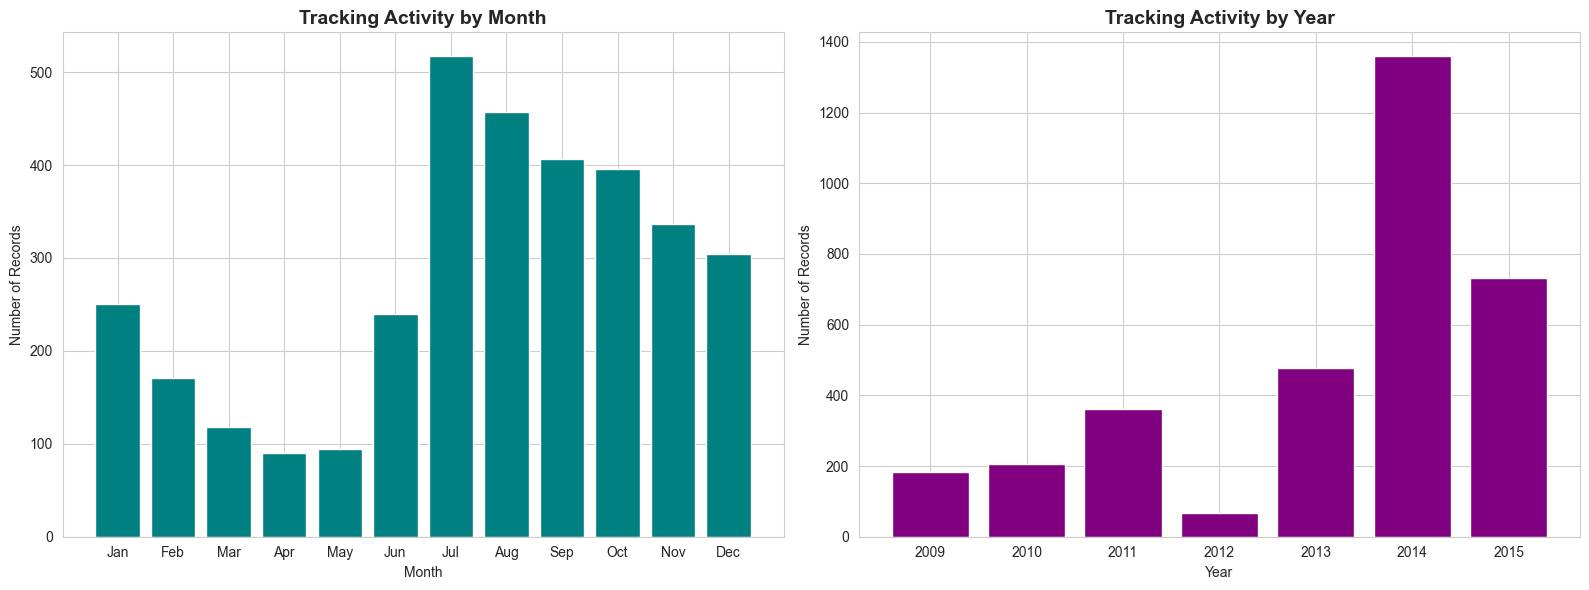


GENERATING HEATMAP


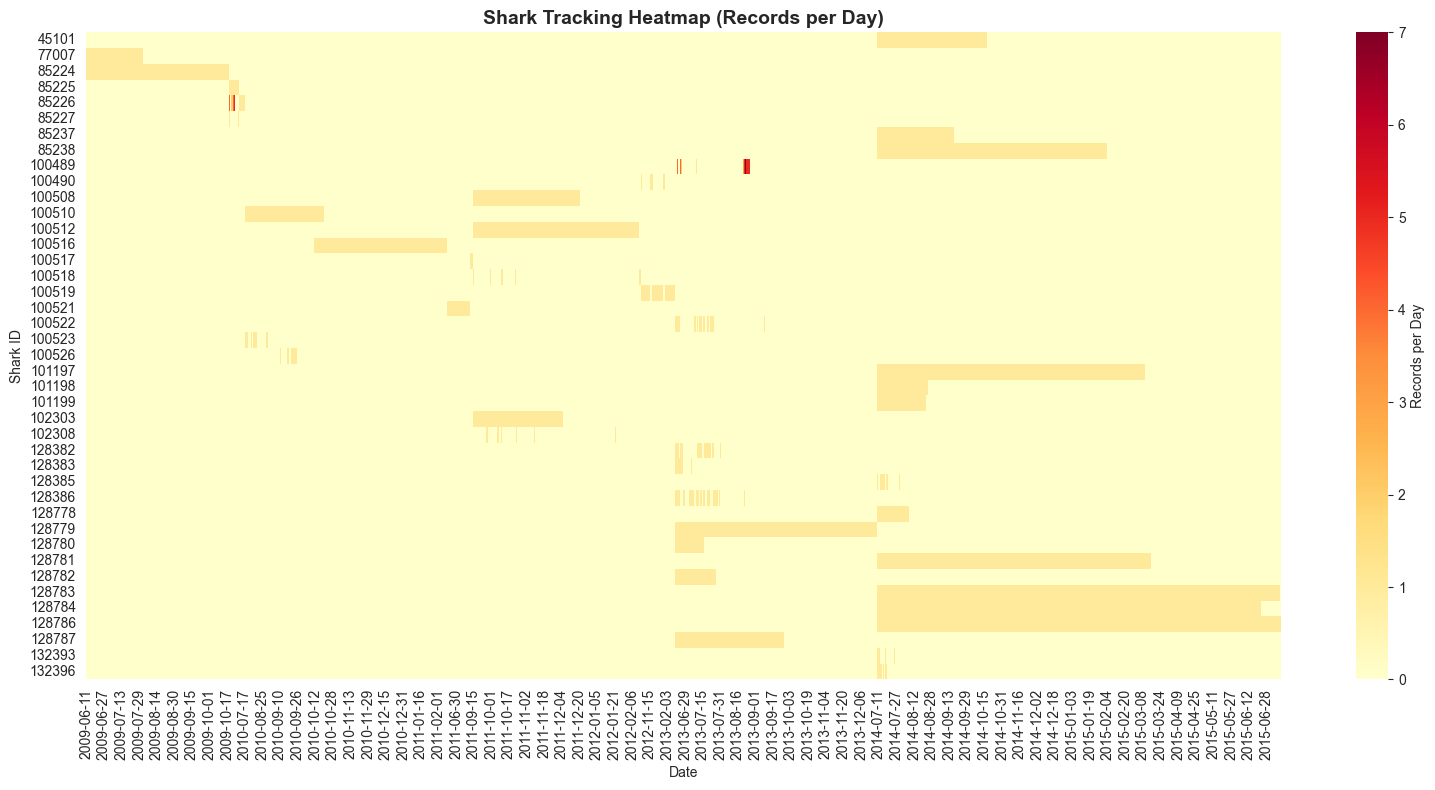


TRACKING GAPS ANALYSIS

Shark 45101: No significant gaps (>7 days)

Shark 77007: No significant gaps (>7 days)

Shark 85224: No significant gaps (>7 days)

Shark 85225: No significant gaps (>7 days)

Shark 85226: 1 gap(s) > 7 days
  2010-06-27 00:00:00 to 2010-07-12 00:00:00 (15 days)

Shark 85227: 1 gap(s) > 7 days
  2010-06-22 00:00:00 to 2010-06-30 00:00:00 (8 days)

Shark 85237: No significant gaps (>7 days)

Shark 85238: No significant gaps (>7 days)

Shark 100489: 2 gap(s) > 7 days
  2013-06-26 00:00:00 to 2013-07-09 00:00:00 (13 days)
  2013-07-09 00:00:00 to 2013-08-21 00:00:00 (43 days)

Shark 100490: 3 gap(s) > 7 days
  2012-10-06 00:00:00 to 2012-11-27 00:00:00 (52 days)
  2012-11-27 00:00:00 to 2012-12-06 00:00:00 (9 days)
  2012-12-06 00:00:00 to 2013-01-01 00:00:00 (26 days)

Shark 100508: No significant gaps (>7 days)

Shark 100510: No significant gaps (>7 days)

Shark 100512: No significant gaps (>7 days)

Shark 100516: No significant gaps (>7 days)

Shark 100517: No s

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Convert timestamp to datetime and extract date only
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

# Display basic information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Total records: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Number of unique sharks: {df['individual-local-identifier'].nunique()}")
print("\nFirst few rows:")
print(df.head())
print("\n")

# 1. SHARK IDENTIFICATION ANALYSIS
print("="*60)
print("SHARK TRACKING SUMMARY")
print("="*60)

shark_summary = df.groupby('individual-local-identifier').agg({
    'date': ['min', 'max', 'count']
}).reset_index()
shark_summary.columns = ['Shark_ID', 'First_Seen', 'Last_Seen', 'Total_Records']
shark_summary['Tracking_Days'] = (pd.to_datetime(shark_summary['Last_Seen']) - 
                                   pd.to_datetime(shark_summary['First_Seen'])).dt.days + 1
print(shark_summary.to_string(index=False))
print("\n")

# 2. PLOT: Number of records per shark
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Records per shark
shark_counts = df['individual-local-identifier'].value_counts()
axes[0, 0].barh(range(len(shark_counts)), shark_counts.values, color='steelblue')
axes[0, 0].set_yticks(range(len(shark_counts)))
axes[0, 0].set_yticklabels(shark_counts.index)
axes[0, 0].set_xlabel('Number of Records')
axes[0, 0].set_ylabel('Shark ID')
axes[0, 0].set_title('Total Records per Shark', fontsize=14, fontweight='bold')
axes[0, 0].invert_yaxis()

# Plot 2: Tracking duration per shark
axes[0, 1].barh(shark_summary['Shark_ID'], shark_summary['Tracking_Days'], color='coral')
axes[0, 1].set_xlabel('Tracking Duration (Days)')
axes[0, 1].set_ylabel('Shark ID')
axes[0, 1].set_title('Tracking Duration per Shark', fontsize=14, fontweight='bold')
axes[0, 1].invert_yaxis()

# Plot 3: Timeline of observations per shark
for i, shark_id in enumerate(df['individual-local-identifier'].unique()):
    shark_data = df[df['individual-local-identifier'] == shark_id]
    dates = pd.to_datetime(shark_data['date'])
    axes[1, 0].scatter([dates.min(), dates.max()], [i, i], s=100, alpha=0.6)
    axes[1, 0].plot([dates.min(), dates.max()], [i, i], linewidth=3, alpha=0.7)

axes[1, 0].set_yticks(range(len(df['individual-local-identifier'].unique())))
axes[1, 0].set_yticklabels(df['individual-local-identifier'].unique())
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Shark ID')
axes[1, 0].set_title('Tracking Timeline per Shark', fontsize=14, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Records over time (all sharks)
daily_counts = df.groupby('date').size().reset_index(name='count')
daily_counts['date'] = pd.to_datetime(daily_counts['date'])
axes[1, 1].plot(daily_counts['date'], daily_counts['count'], linewidth=2, color='darkgreen')
axes[1, 1].fill_between(daily_counts['date'], daily_counts['count'], alpha=0.3, color='lightgreen')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Number of Records')
axes[1, 1].set_title('Daily Tracking Activity (All Sharks)', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. TEMPORAL ANALYSIS
print("="*60)
print("TEMPORAL PATTERNS")
print("="*60)

# Convert to datetime for analysis
df['datetime'] = pd.to_datetime(df['date'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()

# Monthly distribution
monthly_dist = df.groupby(['year', 'month']).size().reset_index(name='count')
print("\nRecords per Month:")
print(monthly_dist.to_string(index=False))

# 4. PLOT: Monthly and Yearly patterns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Monthly pattern
month_counts = df.groupby('month').size()
axes[0].bar(month_counts.index, month_counts.values, color='teal')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Records')
axes[0].set_title('Tracking Activity by Month', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Yearly pattern
year_counts = df.groupby('year').size()
axes[1].bar(year_counts.index, year_counts.values, color='purple')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Records')
axes[1].set_title('Tracking Activity by Year', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. HEATMAP: Shark activity over time
print("\n" + "="*60)
print("GENERATING HEATMAP")
print("="*60)

# Create a pivot table for heatmap
heatmap_data = df.groupby(['individual-local-identifier', 'date']).size().reset_index(name='count')
heatmap_pivot = heatmap_data.pivot(index='individual-local-identifier', 
                                    columns='date', 
                                    values='count').fillna(0)

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_pivot, cmap='YlOrRd', cbar_kws={'label': 'Records per Day'})
plt.title('Shark Tracking Heatmap (Records per Day)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Shark ID')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 6. TRACKING GAPS ANALYSIS
print("\n" + "="*60)
print("TRACKING GAPS ANALYSIS")
print("="*60)

for shark_id in df['individual-local-identifier'].unique():
    shark_dates = df[df['individual-local-identifier'] == shark_id]['date'].sort_values().unique()
    shark_dates = pd.to_datetime(shark_dates)
    
    # Find gaps longer than 7 days
    gaps = []
    for i in range(len(shark_dates) - 1):
        gap_days = (shark_dates[i+1] - shark_dates[i]).days
        if gap_days > 7:
            gaps.append({
                'start': shark_dates[i],
                'end': shark_dates[i+1],
                'gap_days': gap_days
            })
    
    if gaps:
        print(f"\nShark {shark_id}: {len(gaps)} gap(s) > 7 days")
        for gap in gaps:
            print(f"  {gap['start']} to {gap['end']} ({gap['gap_days']} days)")
    else:
        print(f"\nShark {shark_id}: No significant gaps (>7 days)")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)

COMPREHENSIVE TRACKING GAPS ANALYSIS

📊 SUMMARY:
   • Total sharks tracked: 41
   • Sharks with significant gaps (>7 days): 15
   • Percentage with significant gaps: 36.6%
   • Total number of significant gaps: 29
   • Total days lost to significant gaps: 806
   • Average gap duration: 38.8 days


📋 DETAILED BREAKDOWN BY SHARK:
----------------------------------------------------------------------
 Shark_ID  Total_Gaps  Significant_Gaps  Max_Gap_Days  Avg_Gap_Days  Total_Gap_Days
   100519          13                 5            40          12.2             125
   100518           4                 4           212          62.2             249
   102308           5                 4            74          23.4             114
   100490           3                 3            52          29.0              87
   100522           7                 2            46          10.0              60
   100489           3                 2            43          19.7              56
    85227  

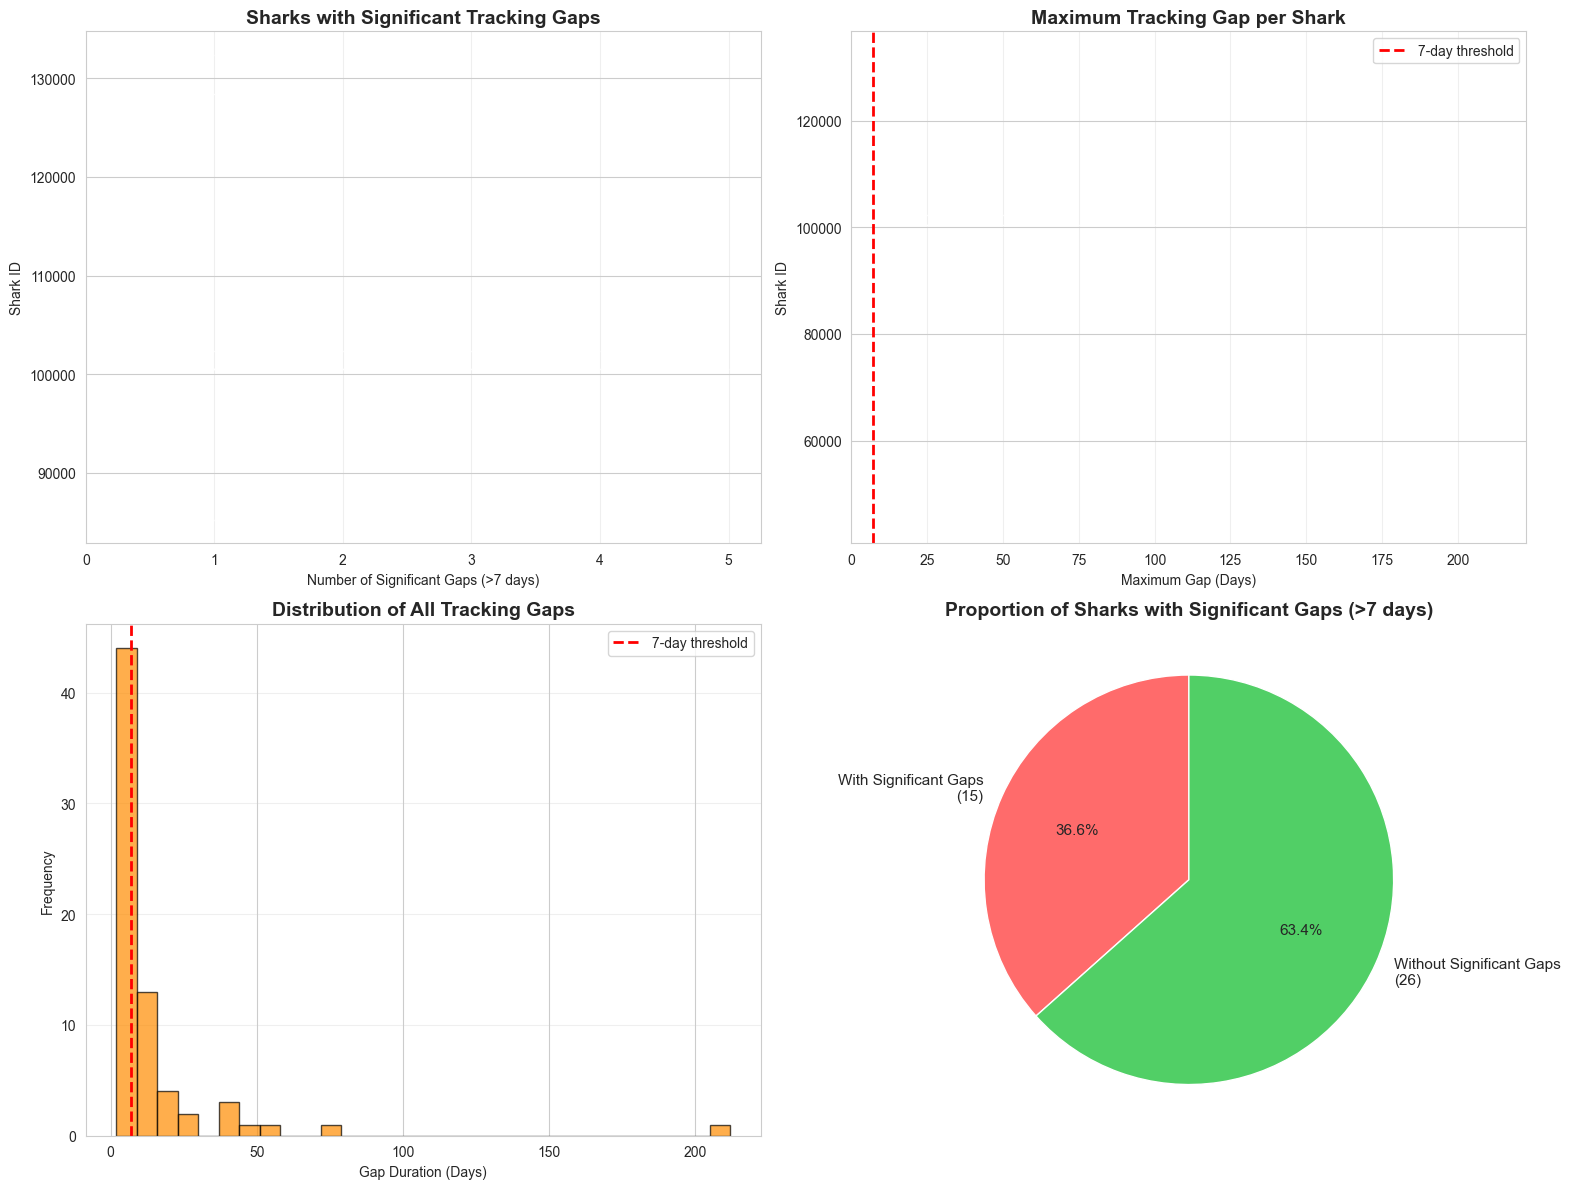



🔍 SHARKS WITH SIGNIFICANT GAPS - DETAILED LIST:

🦈 100518.0:
   • Number of significant gaps: 4.0
   • Longest gap: 212.0 days
   • Total days in significant gaps: 249.0 days

🦈 102308.0:
   • Number of significant gaps: 4.0
   • Longest gap: 74.0 days
   • Total days in significant gaps: 114.0 days

🦈 100490.0:
   • Number of significant gaps: 3.0
   • Longest gap: 52.0 days
   • Total days in significant gaps: 87.0 days

🦈 100522.0:
   • Number of significant gaps: 2.0
   • Longest gap: 46.0 days
   • Total days in significant gaps: 60.0 days

🦈 100489.0:
   • Number of significant gaps: 2.0
   • Longest gap: 43.0 days
   • Total days in significant gaps: 56.0 days

🦈 100519.0:
   • Number of significant gaps: 5.0
   • Longest gap: 40.0 days
   • Total days in significant gaps: 125.0 days

🦈 128386.0:
   • Number of significant gaps: 1.0
   • Longest gap: 23.0 days
   • Total days in significant gaps: 23.0 days

🦈 100521.0:
   • Number of significant gaps: 1.0
   • Longest gap: 20.

In [3]:
# DETAILED GAP ANALYSIS FOR SHARKS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("COMPREHENSIVE TRACKING GAPS ANALYSIS")
print("="*70)

# Store gap information for each shark
gap_summary = []

for shark_id in df['individual-local-identifier'].unique():
    shark_dates = df[df['individual-local-identifier'] == shark_id]['date'].sort_values().unique()
    shark_dates = pd.to_datetime(shark_dates)
    
    # Find all gaps
    gaps = []
    for i in range(len(shark_dates) - 1):
        gap_days = (shark_dates[i+1] - shark_dates[i]).days
        if gap_days > 1:  # Any gap more than 1 day
            gaps.append(gap_days)
    
    # Significant gaps (>7 days)
    significant_gaps = [g for g in gaps if g > 7]
    
    gap_summary.append({
        'Shark_ID': shark_id,
        'Total_Gaps': len(gaps),
        'Significant_Gaps': len(significant_gaps),
        'Max_Gap_Days': max(gaps) if gaps else 0,
        'Avg_Gap_Days': round(sum(gaps) / len(gaps), 1) if gaps else 0,
        'Total_Gap_Days': sum(significant_gaps) if significant_gaps else 0
    })

# Convert to DataFrame
gap_df = pd.DataFrame(gap_summary)

# Overall statistics
sharks_with_sig_gaps = len(gap_df[gap_df['Significant_Gaps'] > 0])
total_sharks = len(gap_df)
total_sig_gaps = gap_df['Significant_Gaps'].sum()
total_gap_days = gap_df['Total_Gap_Days'].sum()

print(f"\n📊 SUMMARY:")
print(f"   • Total sharks tracked: {total_sharks}")
print(f"   • Sharks with significant gaps (>7 days): {sharks_with_sig_gaps}")
print(f"   • Percentage with significant gaps: {sharks_with_sig_gaps/total_sharks*100:.1f}%")
print(f"   • Total number of significant gaps: {total_sig_gaps}")
print(f"   • Total days lost to significant gaps: {total_gap_days}")
print(f"   • Average gap duration: {gap_df[gap_df['Significant_Gaps'] > 0]['Max_Gap_Days'].mean():.1f} days")

print(f"\n\n📋 DETAILED BREAKDOWN BY SHARK:")
print("-"*70)
print(gap_df.sort_values('Significant_Gaps', ascending=False).to_string(index=False))

# VISUALIZATIONS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Number of significant gaps per shark
sharks_with_gaps = gap_df[gap_df['Significant_Gaps'] > 0].sort_values('Significant_Gaps', ascending=True)
if len(sharks_with_gaps) > 0:
    axes[0, 0].barh(sharks_with_gaps['Shark_ID'], sharks_with_gaps['Significant_Gaps'], 
                    color='crimson', alpha=0.7)
    axes[0, 0].set_xlabel('Number of Significant Gaps (>7 days)')
    axes[0, 0].set_ylabel('Shark ID')
    axes[0, 0].set_title('Sharks with Significant Tracking Gaps', fontsize=14, fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'No significant gaps found', 
                    ha='center', va='center', fontsize=12)
    axes[0, 0].set_title('Sharks with Significant Tracking Gaps', fontsize=14, fontweight='bold')

# Plot 2: Maximum gap duration per shark
sharks_sorted = gap_df.sort_values('Max_Gap_Days', ascending=True)
colors = ['crimson' if x > 7 else 'steelblue' for x in sharks_sorted['Max_Gap_Days']]
axes[0, 1].barh(sharks_sorted['Shark_ID'], sharks_sorted['Max_Gap_Days'], 
                color=colors, alpha=0.7)
axes[0, 1].axvline(x=7, color='red', linestyle='--', linewidth=2, label='7-day threshold')
axes[0, 1].set_xlabel('Maximum Gap (Days)')
axes[0, 1].set_ylabel('Shark ID')
axes[0, 1].set_title('Maximum Tracking Gap per Shark', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Distribution of gap sizes
all_gaps = []
for shark_id in df['individual-local-identifier'].unique():
    shark_dates = df[df['individual-local-identifier'] == shark_id]['date'].sort_values().unique()
    shark_dates = pd.to_datetime(shark_dates)
    for i in range(len(shark_dates) - 1):
        gap_days = (shark_dates[i+1] - shark_dates[i]).days
        if gap_days > 1:
            all_gaps.append(gap_days)

if all_gaps:
    axes[1, 0].hist(all_gaps, bins=30, color='darkorange', alpha=0.7, edgecolor='black')
    axes[1, 0].axvline(x=7, color='red', linestyle='--', linewidth=2, label='7-day threshold')
    axes[1, 0].set_xlabel('Gap Duration (Days)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of All Tracking Gaps', fontsize=14, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Pie chart - Sharks with vs without significant gaps
gap_categories = [sharks_with_sig_gaps, total_sharks - sharks_with_sig_gaps]
labels = [f'With Significant Gaps\n({sharks_with_sig_gaps})', 
          f'Without Significant Gaps\n({total_sharks - sharks_with_sig_gaps})']
colors_pie = ['#ff6b6b', '#51cf66']
axes[1, 1].pie(gap_categories, labels=labels, autopct='%1.1f%%', 
               colors=colors_pie, startangle=90, textprops={'fontsize': 11})
axes[1, 1].set_title('Proportion of Sharks with Significant Gaps (>7 days)', 
                      fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ADDITIONAL DETAILED LIST
print("\n\n🔍 SHARKS WITH SIGNIFICANT GAPS - DETAILED LIST:")
print("="*70)
sharks_with_sig = gap_df[gap_df['Significant_Gaps'] > 0].sort_values('Max_Gap_Days', ascending=False)
if len(sharks_with_sig) > 0:
    for idx, row in sharks_with_sig.iterrows():
        print(f"\n🦈 {row['Shark_ID']}:")
        print(f"   • Number of significant gaps: {row['Significant_Gaps']}")
        print(f"   • Longest gap: {row['Max_Gap_Days']} days")
        print(f"   • Total days in significant gaps: {row['Total_Gap_Days']} days")
else:
    print("\n✅ No sharks have significant gaps (>7 days)")

print("\n" + "="*70)

FILTERING SHARKS BY GAP CRITERIA
Removal criteria:
  • More than 2 significant gaps (>7 days), OR
  • Any gap longer than 15 days

📋 SHARKS TO REMOVE: 8 out of 41
----------------------------------------------------------------------
  ❌ 100489: max gap of 43 days
  ❌ 100490: 3 significant gaps AND max gap of 52 days
  ❌ 100518: 4 significant gaps AND max gap of 212 days
  ❌ 100519: 5 significant gaps AND max gap of 40 days
  ❌ 100521: max gap of 20 days
  ❌ 100522: max gap of 46 days
  ❌ 102308: 4 significant gaps AND max gap of 74 days
  ❌ 128386: max gap of 23 days


📊 BEFORE FILTERING:
   • Total records: 3,382
   • Total sharks: 41

📊 AFTER FILTERING:
   • Total records: 3,229
   • Total sharks: 33
   • Records removed: 153 (4.5%)
   • Sharks removed: 8 (19.5%)


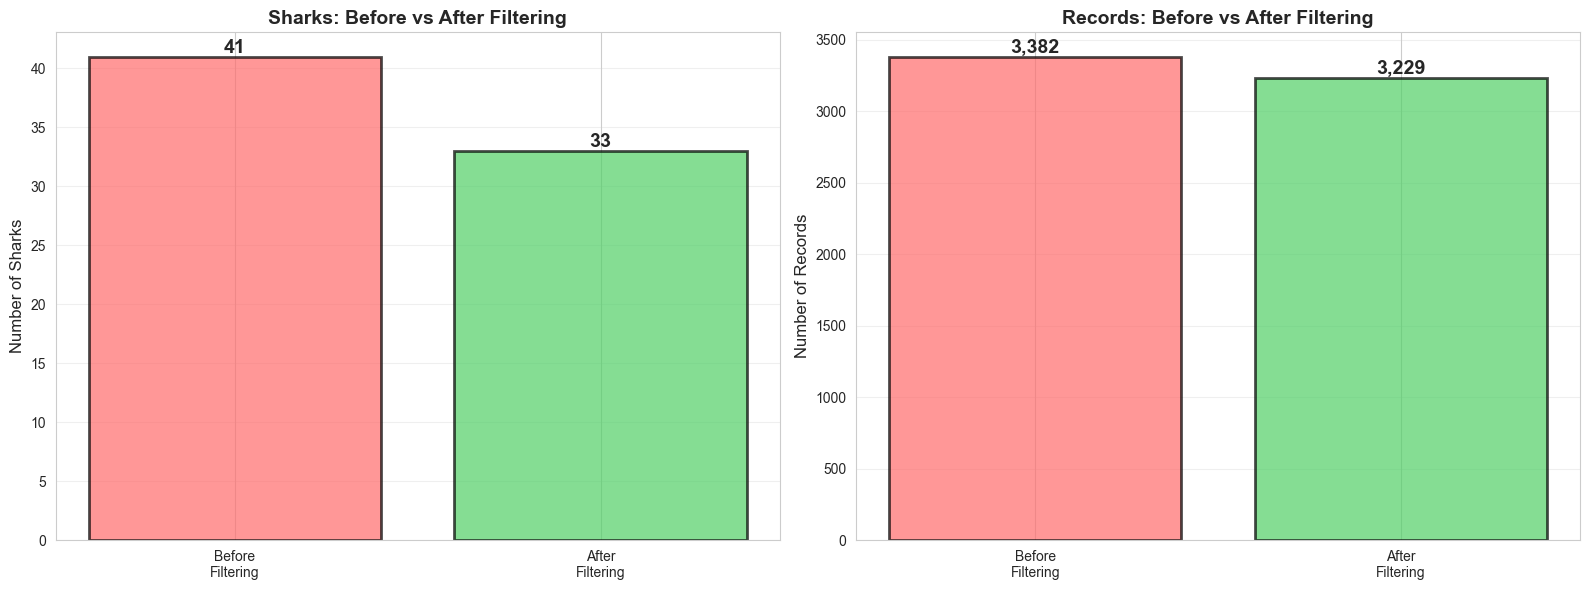



🦈 REMAINING SHARKS (33):
----------------------------------------------------------------------
 Shark_ID First_Seen  Last_Seen  Total_Records
    45101 2014-07-10 2014-10-17            100
    77007 2009-06-11 2009-08-01             52
    85224 2009-06-11 2009-10-18            130
    85225 2010-06-22 2010-06-30              9
    85226 2010-06-22 2010-07-17             23
    85227 2010-06-22 2010-06-30              2
    85237 2014-07-10 2014-09-17             70
    85238 2014-07-10 2015-02-03            209
   100508 2011-09-15 2011-12-20             97
   100510 2010-08-09 2010-10-19             71
   100512 2011-09-15 2012-02-12            151
   100516 2010-10-11 2011-02-08            121
   100517 2011-09-11 2011-09-14              3
   100523 2010-08-09 2010-08-30              9
   100526 2010-09-10 2010-09-25              9
   101197 2014-07-10 2015-03-09            243
   101198 2014-07-10 2014-08-24             46
   101199 2014-07-10 2014-08-22             44
   102303

In [4]:
# FILTER OUT SHARKS WITH EXCESSIVE GAPS
import pandas as pd
import matplotlib.pyplot as plt

print("="*70)
print("FILTERING SHARKS BY GAP CRITERIA")
print("="*70)
print("Removal criteria:")
print("  • More than 2 significant gaps (>7 days), OR")
print("  • Any gap longer than 15 days")
print("="*70)

# Identify sharks to remove
sharks_to_remove = []
removal_reasons = {}

for shark_id in df['individual-local-identifier'].unique():
    shark_dates = df[df['individual-local-identifier'] == shark_id]['date'].sort_values().unique()
    shark_dates = pd.to_datetime(shark_dates)
    
    # Find all gaps
    gaps = []
    for i in range(len(shark_dates) - 1):
        gap_days = (shark_dates[i+1] - shark_dates[i]).days
        if gap_days > 7:  # Significant gaps
            gaps.append(gap_days)
    
    # Check removal criteria
    max_gap = max(gaps) if gaps else 0
    num_significant_gaps = len(gaps)
    
    should_remove = False
    reason = []
    
    if num_significant_gaps > 2:
        should_remove = True
        reason.append(f"{num_significant_gaps} significant gaps")
    
    if max_gap > 15:
        should_remove = True
        reason.append(f"max gap of {max_gap} days")
    
    if should_remove:
        sharks_to_remove.append(shark_id)
        removal_reasons[shark_id] = " AND ".join(reason)

# Print removal summary
print(f"\n📋 SHARKS TO REMOVE: {len(sharks_to_remove)} out of {df['individual-local-identifier'].nunique()}")
print("-"*70)

if sharks_to_remove:
    for shark_id in sharks_to_remove:
        print(f"  ❌ {shark_id}: {removal_reasons[shark_id]}")
else:
    print("  ✅ No sharks meet the removal criteria!")

# Original dataset stats
original_total_records = len(df)
original_total_sharks = df['individual-local-identifier'].nunique()

print(f"\n\n📊 BEFORE FILTERING:")
print(f"   • Total records: {original_total_records:,}")
print(f"   • Total sharks: {original_total_sharks}")

# Create filtered dataframe
df_filtered = df[~df['individual-local-identifier'].isin(sharks_to_remove)].copy()

# Filtered dataset stats
filtered_total_records = len(df_filtered)
filtered_total_sharks = df_filtered['individual-local-identifier'].nunique()

print(f"\n📊 AFTER FILTERING:")
print(f"   • Total records: {filtered_total_records:,}")
print(f"   • Total sharks: {filtered_total_sharks}")
print(f"   • Records removed: {original_total_records - filtered_total_records:,} ({(original_total_records - filtered_total_records)/original_total_records*100:.1f}%)")
print(f"   • Sharks removed: {original_total_sharks - filtered_total_sharks} ({(original_total_sharks - filtered_total_sharks)/original_total_sharks*100:.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Before vs After - Number of sharks
categories = ['Before\nFiltering', 'After\nFiltering']
shark_counts = [original_total_sharks, filtered_total_sharks]
colors = ['#ff6b6b', '#51cf66']

bars1 = axes[0].bar(categories, shark_counts, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Number of Sharks', fontsize=12)
axes[0].set_title('Sharks: Before vs After Filtering', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=14, fontweight='bold')

# Plot 2: Before vs After - Number of records
record_counts = [original_total_records, filtered_total_records]
bars2 = axes[1].bar(categories, record_counts, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Number of Records', fontsize=12)
axes[1].set_title('Records: Before vs After Filtering', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Show remaining sharks
print(f"\n\n🦈 REMAINING SHARKS ({filtered_total_sharks}):")
print("-"*70)
remaining_summary = df_filtered.groupby('individual-local-identifier').agg({
    'date': ['min', 'max', 'count']
}).reset_index()
remaining_summary.columns = ['Shark_ID', 'First_Seen', 'Last_Seen', 'Total_Records']
print(remaining_summary.to_string(index=False))

print("\n" + "="*70)
print("✅ FILTERING COMPLETE!")
print("="*70)
print(f"The filtered dataset is now stored in: df_filtered")
print("You can use 'df_filtered' for further analysis.")
print("="*70)

COMPREHENSIVE TRACKING GAPS ANALYSIS - FILTERED DATA

📊 SUMMARY (FILTERED DATA):
   • Total sharks tracked: 33
   • Sharks with significant gaps (>7 days): 7
   • Percentage with significant gaps: 21.2%
   • Total number of significant gaps: 7
   • Total days lost to significant gaps: 72
   • Average gap duration: 10.3 days


📋 DETAILED BREAKDOWN BY SHARK:
----------------------------------------------------------------------
 Shark_ID  Total_Gaps  Significant_Gaps  Max_Gap_Days  Avg_Gap_Days  Total_Gap_Days
    85226           2                 1            15           8.5              15
   132393           2                 1             8           6.5               8
    85227           1                 1             8           8.0               8
   100523           3                 1             9           5.3               9
   128383           1                 1             8           8.0               8
   128382           5                 1            13           5.

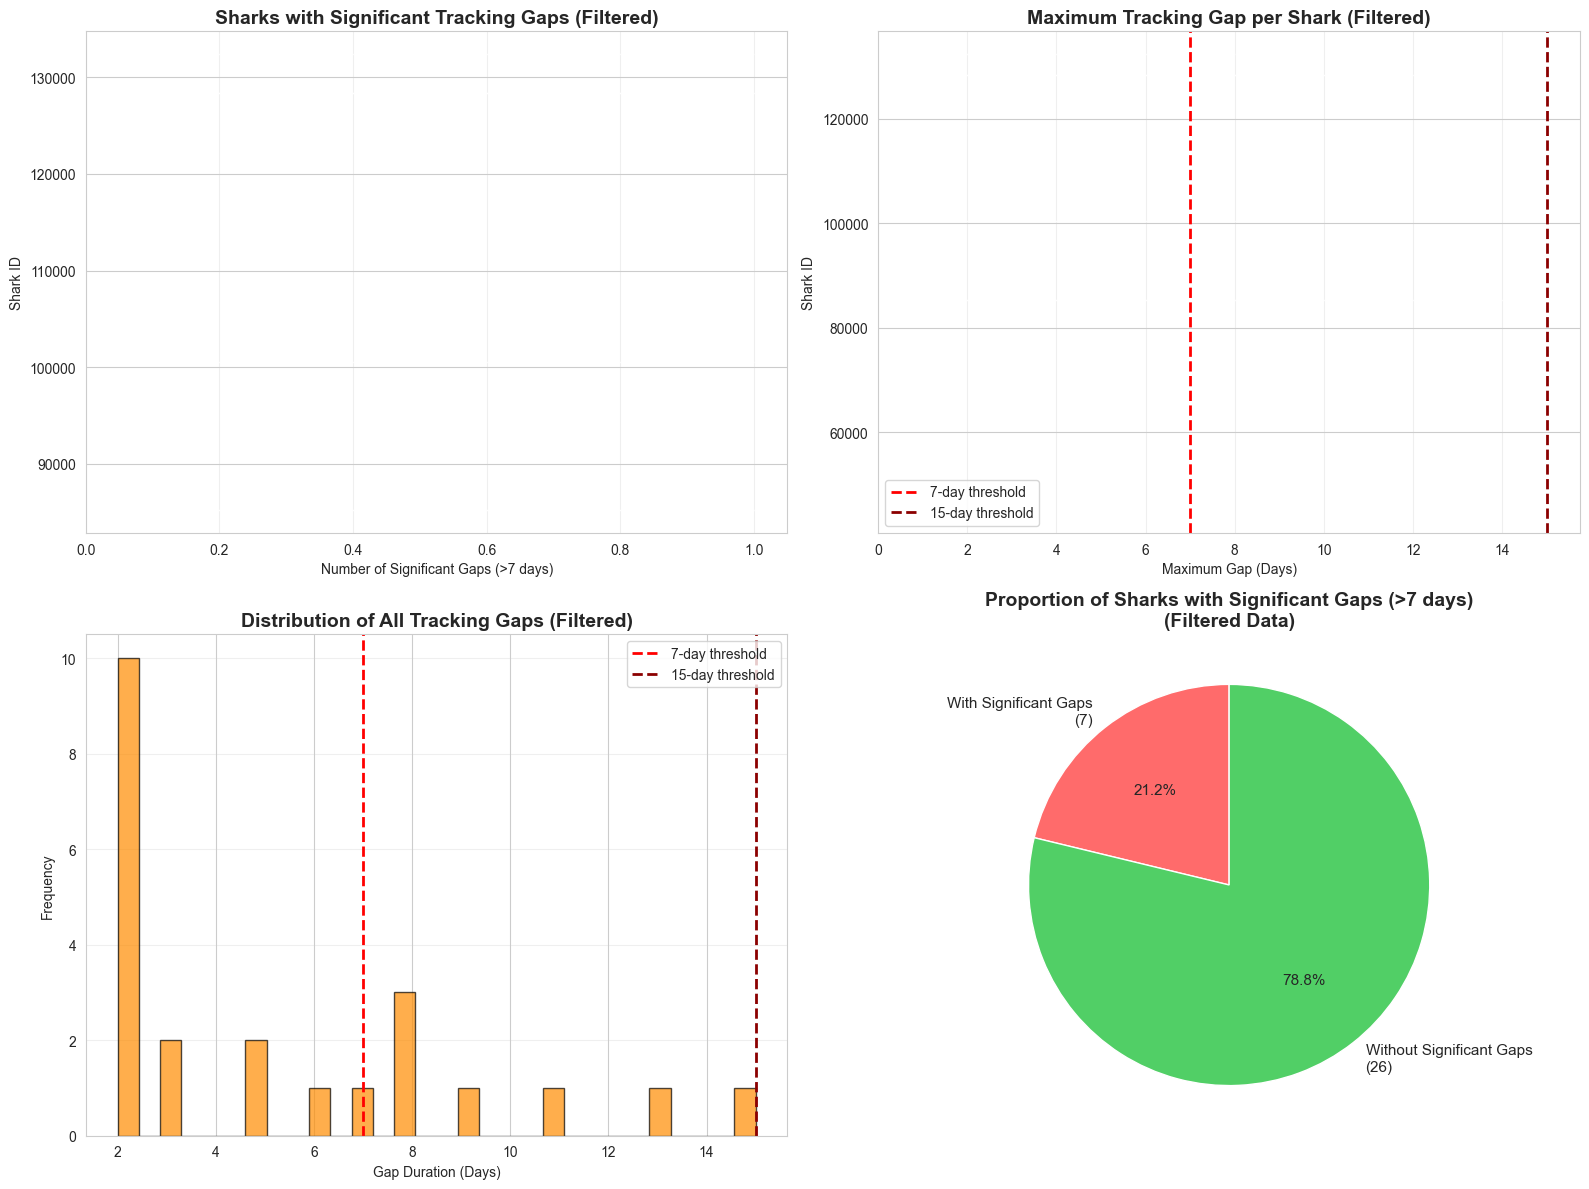



🔍 SHARKS WITH SIGNIFICANT GAPS - DETAILED LIST:

🦈 85226.0:
   • Number of significant gaps: 1.0
   • Longest gap: 15.0 days
   • Total days in significant gaps: 15.0 days

🦈 128382.0:
   • Number of significant gaps: 1.0
   • Longest gap: 13.0 days
   • Total days in significant gaps: 13.0 days

🦈 128385.0:
   • Number of significant gaps: 1.0
   • Longest gap: 11.0 days
   • Total days in significant gaps: 11.0 days

🦈 100523.0:
   • Number of significant gaps: 1.0
   • Longest gap: 9.0 days
   • Total days in significant gaps: 9.0 days

🦈 85227.0:
   • Number of significant gaps: 1.0
   • Longest gap: 8.0 days
   • Total days in significant gaps: 8.0 days

🦈 128383.0:
   • Number of significant gaps: 1.0
   • Longest gap: 8.0 days
   • Total days in significant gaps: 8.0 days

🦈 132393.0:
   • Number of significant gaps: 1.0
   • Longest gap: 8.0 days
   • Total days in significant gaps: 8.0 days


DATA QUALITY IMPROVEMENT SUMMARY

✅ QUALITY METRICS:
   • Largest gap in dataset: 1

In [5]:
# DETAILED GAP ANALYSIS FOR FILTERED SHARKS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("COMPREHENSIVE TRACKING GAPS ANALYSIS - FILTERED DATA")
print("="*70)

# Store gap information for each shark in filtered dataset
gap_summary_filtered = []

for shark_id in df_filtered['individual-local-identifier'].unique():
    shark_dates = df_filtered[df_filtered['individual-local-identifier'] == shark_id]['date'].sort_values().unique()
    shark_dates = pd.to_datetime(shark_dates)
    
    # Find all gaps
    gaps = []
    for i in range(len(shark_dates) - 1):
        gap_days = (shark_dates[i+1] - shark_dates[i]).days
        if gap_days > 1:  # Any gap more than 1 day
            gaps.append(gap_days)
    
    # Significant gaps (>7 days)
    significant_gaps = [g for g in gaps if g > 7]
    
    gap_summary_filtered.append({
        'Shark_ID': shark_id,
        'Total_Gaps': len(gaps),
        'Significant_Gaps': len(significant_gaps),
        'Max_Gap_Days': max(gaps) if gaps else 0,
        'Avg_Gap_Days': round(sum(gaps) / len(gaps), 1) if gaps else 0,
        'Total_Gap_Days': sum(significant_gaps) if significant_gaps else 0
    })

# Convert to DataFrame
gap_df_filtered = pd.DataFrame(gap_summary_filtered)

# Overall statistics
sharks_with_sig_gaps = len(gap_df_filtered[gap_df_filtered['Significant_Gaps'] > 0])
total_sharks = len(gap_df_filtered)
total_sig_gaps = gap_df_filtered['Significant_Gaps'].sum()
total_gap_days = gap_df_filtered['Total_Gap_Days'].sum()

print(f"\n📊 SUMMARY (FILTERED DATA):")
print(f"   • Total sharks tracked: {total_sharks}")
print(f"   • Sharks with significant gaps (>7 days): {sharks_with_sig_gaps}")
print(f"   • Percentage with significant gaps: {sharks_with_sig_gaps/total_sharks*100:.1f}%")
print(f"   • Total number of significant gaps: {total_sig_gaps}")
print(f"   • Total days lost to significant gaps: {total_gap_days}")
if sharks_with_sig_gaps > 0:
    print(f"   • Average gap duration: {gap_df_filtered[gap_df_filtered['Significant_Gaps'] > 0]['Max_Gap_Days'].mean():.1f} days")
else:
    print(f"   • Average gap duration: 0.0 days")

print(f"\n\n📋 DETAILED BREAKDOWN BY SHARK:")
print("-"*70)
print(gap_df_filtered.sort_values('Significant_Gaps', ascending=False).to_string(index=False))

# VISUALIZATIONS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Number of significant gaps per shark
sharks_with_gaps = gap_df_filtered[gap_df_filtered['Significant_Gaps'] > 0].sort_values('Significant_Gaps', ascending=True)
if len(sharks_with_gaps) > 0:
    axes[0, 0].barh(sharks_with_gaps['Shark_ID'], sharks_with_gaps['Significant_Gaps'], 
                    color='crimson', alpha=0.7)
    axes[0, 0].set_xlabel('Number of Significant Gaps (>7 days)')
    axes[0, 0].set_ylabel('Shark ID')
    axes[0, 0].set_title('Sharks with Significant Tracking Gaps (Filtered)', fontsize=14, fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'No significant gaps found', 
                    ha='center', va='center', fontsize=12)
    axes[0, 0].set_title('Sharks with Significant Tracking Gaps (Filtered)', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlim(0, 1)

# Plot 2: Maximum gap duration per shark
sharks_sorted = gap_df_filtered.sort_values('Max_Gap_Days', ascending=True)
colors = ['crimson' if x > 7 else 'steelblue' for x in sharks_sorted['Max_Gap_Days']]
axes[0, 1].barh(sharks_sorted['Shark_ID'], sharks_sorted['Max_Gap_Days'], 
                color=colors, alpha=0.7)
axes[0, 1].axvline(x=7, color='red', linestyle='--', linewidth=2, label='7-day threshold')
axes[0, 1].axvline(x=15, color='darkred', linestyle='--', linewidth=2, label='15-day threshold')
axes[0, 1].set_xlabel('Maximum Gap (Days)')
axes[0, 1].set_ylabel('Shark ID')
axes[0, 1].set_title('Maximum Tracking Gap per Shark (Filtered)', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Distribution of gap sizes
all_gaps_filtered = []
for shark_id in df_filtered['individual-local-identifier'].unique():
    shark_dates = df_filtered[df_filtered['individual-local-identifier'] == shark_id]['date'].sort_values().unique()
    shark_dates = pd.to_datetime(shark_dates)
    for i in range(len(shark_dates) - 1):
        gap_days = (shark_dates[i+1] - shark_dates[i]).days
        if gap_days > 1:
            all_gaps_filtered.append(gap_days)

if all_gaps_filtered:
    axes[1, 0].hist(all_gaps_filtered, bins=30, color='darkorange', alpha=0.7, edgecolor='black')
    axes[1, 0].axvline(x=7, color='red', linestyle='--', linewidth=2, label='7-day threshold')
    axes[1, 0].axvline(x=15, color='darkred', linestyle='--', linewidth=2, label='15-day threshold')
    axes[1, 0].set_xlabel('Gap Duration (Days)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of All Tracking Gaps (Filtered)', fontsize=14, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(axis='y', alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'No gaps found', 
                    ha='center', va='center', fontsize=12)
    axes[1, 0].set_title('Distribution of All Tracking Gaps (Filtered)', fontsize=14, fontweight='bold')

# Plot 4: Pie chart - Sharks with vs without significant gaps
gap_categories = [sharks_with_sig_gaps, total_sharks - sharks_with_sig_gaps]
labels = [f'With Significant Gaps\n({sharks_with_sig_gaps})', 
          f'Without Significant Gaps\n({total_sharks - sharks_with_sig_gaps})']
colors_pie = ['#ff6b6b', '#51cf66']
axes[1, 1].pie(gap_categories, labels=labels, autopct='%1.1f%%', 
               colors=colors_pie, startangle=90, textprops={'fontsize': 11})
axes[1, 1].set_title('Proportion of Sharks with Significant Gaps (>7 days)\n(Filtered Data)', 
                      fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ADDITIONAL DETAILED LIST
print("\n\n🔍 SHARKS WITH SIGNIFICANT GAPS - DETAILED LIST:")
print("="*70)
sharks_with_sig = gap_df_filtered[gap_df_filtered['Significant_Gaps'] > 0].sort_values('Max_Gap_Days', ascending=False)
if len(sharks_with_sig) > 0:
    for idx, row in sharks_with_sig.iterrows():
        print(f"\n🦈 {row['Shark_ID']}:")
        print(f"   • Number of significant gaps: {row['Significant_Gaps']}")
        print(f"   • Longest gap: {row['Max_Gap_Days']} days")
        print(f"   • Total days in significant gaps: {row['Total_Gap_Days']} days")
else:
    print("\n✅ No sharks have significant gaps (>7 days)")

# DATA QUALITY SUMMARY
print("\n\n" + "="*70)
print("DATA QUALITY IMPROVEMENT SUMMARY")
print("="*70)

# Calculate improvement metrics
max_gap_in_filtered = gap_df_filtered['Max_Gap_Days'].max()
avg_max_gap = gap_df_filtered['Max_Gap_Days'].mean()

print(f"\n✅ QUALITY METRICS:")
print(f"   • Largest gap in dataset: {max_gap_in_filtered} days (≤15 days ✓)")
print(f"   • Average maximum gap per shark: {avg_max_gap:.1f} days")
print(f"   • Maximum significant gaps per shark: {gap_df_filtered['Significant_Gaps'].max()} (≤2 ✓)")
print(f"   • Sharks with perfect tracking (no gaps >7 days): {total_sharks - sharks_with_sig_gaps}")

print("\n" + "="*70)

In [6]:
# CREATE FINAL DATASET WITH REQUESTED COLUMNS
import pandas as pd

print("="*70)
print("CREATING FINAL FILTERED DATASET")
print("="*70)

# Create the final dataset with the requested columns
final_dataset = df_filtered[['individual-local-identifier', 'location-long', 'location-lat', 'shark_name', 'date']].copy()

# Rename columns as requested
final_dataset = final_dataset.rename(columns={
    'individual-local-identifier': 'shark_ID',
    'location-long': 'location-long',
    'location-lat': 'location-lat'
})

print(f"\n📊 FINAL DATASET SUMMARY:")
print(f"   • Total records: {len(final_dataset):,}")
print(f"   • Total sharks: {final_dataset['shark_ID'].nunique()}")
print(f"   • Date range: {final_dataset['date'].min()} to {final_dataset['date'].max()}")
print(f"   • Columns: {list(final_dataset.columns)}")

print(f"\n🔍 SAMPLE OF FINAL DATASET:")
print("-"*70)
print(final_dataset.head(10))

print(f"\n✅ FINAL DATASET CREATED!")
print(f"   Variable name: final_dataset")
print(f"   Shape: {final_dataset.shape}")
print(f"   Memory usage: {final_dataset.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

print("\n" + "="*70)

CREATING FINAL FILTERED DATASET

📊 FINAL DATASET SUMMARY:
   • Total records: 3,229
   • Total sharks: 33
   • Date range: 2009-06-11 to 2015-07-11
   • Columns: ['shark_ID', 'location-long', 'location-lat', 'shark_name', 'date']

🔍 SAMPLE OF FINAL DATASET:
----------------------------------------------------------------------
   shark_ID  location-long  location-lat   shark_name        date
0     45101     -90.905000     28.054000  whale_shark  2014-07-10
1     45101     -91.150922     26.707780  whale_shark  2014-07-11
2     45101     -91.194314     26.693058  whale_shark  2014-07-12
3     45101     -91.434551     26.718662  whale_shark  2014-07-13
4     45101     -91.667210     26.878502  whale_shark  2014-07-14
5     45101     -91.776001     26.998278  whale_shark  2014-07-15
6     45101     -91.782307     26.977038  whale_shark  2014-07-16
7     45101     -91.988083     26.918631  whale_shark  2014-07-17
8     45101     -91.482247     27.156028  whale_shark  2014-07-18
9     45101

# DATOS SATELITALES

In [4]:
%pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/86/41/585a168330ff063014880a80d744219dbf1dd7a1c706e75ab3425a987384/pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/81/c4/34e93fe5f5429d7570ec1fa436f1986fb1f00c3e0f43a589fe2bbcd22c3f/pytz-2025.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/5c/23/c7abc0ca0a1526a0774eca151daeb8de62ec457e77262b66b359c3c7679e/tzdata-2025.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.0 MB 8.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/11.0 MB 20.8 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.0 MB 31.9 MB/s eta 0:00:01
   -------------------------- ------------- 7.2/11.0 MB 38.1 MB/s eta 0:00:


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

df = pd.read_csv('filtered_whale_shark_movements.csv')

In [19]:
import numpy as np

# Tag existing data as foraging habitats (positive class)
df_tagged = df.copy()
df_tagged['is_foraging'] = 1  # 1 = foraging habitat

print(f"Original dataset shape: {df_tagged.shape}")
print(f"Positive samples: {len(df_tagged)}")

# Generate negative samples (non-foraging habitats)
# Create equal number of negative samples by perturbing coordinates
num_negatives = len(df_tagged)

negative_samples = []
for idx, row in df_tagged.iterrows():
    # Generate random displacement: 0.2 to 1.0 degrees (about 22-111 km)
    displacement_lat = np.random.uniform(0.2, 1.0) * np.random.choice([-1, 1])
    displacement_lon = np.random.uniform(0.2, 1.0) * np.random.choice([-1, 1])
    
    new_lat = row['location-lat'] + displacement_lat
    new_lon = row['location-long'] + displacement_lon
    
    # Ensure within reasonable bounds (Gulf of Mexico area)
    new_lat = np.clip(new_lat, 18, 31)  # Approximate Gulf lat bounds
    new_lon = np.clip(new_lon, -98, -80)  # Approximate Gulf lon bounds
    
    negative_samples.append({
        'shark_ID': f"negative_{idx}",
        'location-long': new_lon,
        'location-lat': new_lat,
        'shark_name': 'simulated_non_foraging',
        'date': row['date'],  # Keep same date for temporal consistency
        'is_foraging': 0  # 0 = non-foraging habitat
    })

# Create DataFrame for negative samples
df_negatives = pd.DataFrame(negative_samples)

# Combine positive and negative samples
df_final = pd.concat([df_tagged, df_negatives], ignore_index=True)

print(f"Negative samples generated: {len(df_negatives)}")
print(f"Final dataset shape: {df_final.shape}")
print(f"Class distribution:")
print(df_final['is_foraging'].value_counts())

Original dataset shape: (6458, 6)
Positive samples: 6458
Negative samples generated: 6458
Final dataset shape: (12916, 6)
Class distribution:
is_foraging
1    6458
0    6458
Name: count, dtype: int64
Negative samples generated: 6458
Final dataset shape: (12916, 6)
Class distribution:
is_foraging
1    6458
0    6458
Name: count, dtype: int64


In [20]:
# delete columns not needed
df_final = df_final[['location-long', 'location-lat', 'date', 'is_foraging']]

# Save the tagged dataset
output_file = 'tagged_filtered_whale_shark_movements.csv'
df_final.to_csv(output_file, index=False)
print(f"\nTagged dataset saved to: {output_file}")

# Display sample
print("\nSample of tagged dataset:")
print(df_final.head(10))


Tagged dataset saved to: tagged_filtered_whale_shark_movements.csv

Sample of tagged dataset:
   location-long  location-lat        date  is_foraging
0     -90.905000     28.054000  2014-07-10            1
1     -91.150922     26.707780  2014-07-11            1
2     -91.194314     26.693058  2014-07-12            1
3     -91.434551     26.718662  2014-07-13            1
4     -91.667210     26.878502  2014-07-14            1
5     -91.776001     26.998278  2014-07-15            1
6     -91.782307     26.977038  2014-07-16            1
7     -91.988083     26.918631  2014-07-17            1
8     -91.482247     27.156028  2014-07-18            1
9     -91.123969     27.218016  2014-07-19            1


In [21]:
df = pd.read_csv('tagged_filtered_whale_shark_movements.csv')
df.head()

,location-long,location-lat,date,is_foraging
0,-90.905000,28.054000,2014-07-10,1
1,-91.150922,26.707780,2014-07-11,1
2,-91.194314,26.693058,2014-07-12,1
3,-91.434551,26.718662,2014-07-13,1
4,-91.667210,26.878502,2014-07-14,1


In [1]:
%pip install netCDF4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import netCDF4

# Open the NetCDF file
nc_file = netCDF4.Dataset('C:/Users/chuca/Desktop/NasaSpaceApps/descargas/flh_binned/AQUA_MODIS.20090618_20090625.L3m.8D.FLH.nflh.9km.nc', 'r')

# View the available variables
print(nc_file.variables)

# Explore the file's metadata (global attributes)
print(nc_file.ncattrs())

# Close the file
nc_file.close()


{'nflh': <class 'netCDF4.Variable'>
int16 nflh(lat, lon)
    long_name: Normalized Fluorescence Line Height
    scale_factor: 8.5e-05
    add_offset: 2.25
    units: W m^-2 um^-1 sr^-1
    _FillValue: -32767
    valid_min: -32352
    valid_max: 32352
    reference: Behrenfeld, M.J., Westberry, T.K., Boss, E.S., O'Malley, R.T., Siegel, D.A., Wiggert, J.D., Franz, B.A., McClain, C.R., Feldman, G.C., Doney, S.C., Moore, J.K., Dall'Olmo, G., Milligan, A.J., Lima, I., and Mahowald, N.: Satellite-detected fluorescence reveals global physiology of ocean phytoplankton, Biogeosciences, 6, 779-794, doi:10.5194/bg-6-779-2009, 2009.
    display_scale: linear
    display_min: 0.0
    display_max: 0.5
unlimited dimensions: 
current shape = (2160, 4320)
filling on, 'lat': <class 'netCDF4.Variable'>
float32 lat(lat)
    long_name: Latitude
    units: degrees_north
    standard_name: latitude
    _FillValue: -999.0
    valid_min: -90.0
    valid_max: 90.0
unlimited dimensions: 
current shape = (2160,)


In [23]:
import netCDF4
import numpy as np

# Open the NetCDF file
nc_file = netCDF4.Dataset('C:/Users/chuca/Desktop/NasaSpaceApps/descargas/flh_binned/AQUA_MODIS.20090618_20090625.L3m.8D.FLH.nflh.9km.nc', 'r')

# Print dimensions
print("Dimensions:")
for dim in nc_file.dimensions:
    print(f"  {dim}: {nc_file.dimensions[dim]}")

# Print variables with shapes
print("\nVariables:")
for var_name in nc_file.variables:
    var = nc_file.variables[var_name]
    print(f"  {var_name}: {var.shape} - {var.long_name if hasattr(var, 'long_name') else ''}")

# Check nflh variable details
nflh = nc_file.variables['nflh']
print(f"\nNFLH details:")
print(f"  Shape: {nflh.shape}")
print(f"  Fill value: {nflh._FillValue if hasattr(nflh, '_FillValue') else 'None'}")
print(f"  Valid range: {nflh.valid_range if hasattr(nflh, 'valid_range') else 'None'}")

# Get lat/lon
lat = nc_file.variables['lat'][:]
lon = nc_file.variables['lon'][:]
print(f"\nLat range: {lat.min()} to {lat.max()}")
print(f"Lon range: {lon.min()} to {lon.max()}")

# Sample nflh values
nflh_data = nflh[:]
print(f"NFLH sample values (first 5x5):")
print(nflh_data[:5, :5])
print(f"Non-zero values: {np.count_nonzero(nflh_data)}")
print(f"NaN values: {np.isnan(nflh_data).sum()}")
print(f"Zero values: {(nflh_data == 0).sum()}")

# Close the file
nc_file.close()

Dimensions:
  lat: "<class 'netCDF4.Dimension'>": name = 'lat', size = 2160
  lon: "<class 'netCDF4.Dimension'>": name = 'lon', size = 4320
  rgb: "<class 'netCDF4.Dimension'>": name = 'rgb', size = 3
  eightbitcolor: "<class 'netCDF4.Dimension'>": name = 'eightbitcolor', size = 256

Variables:
  nflh: (2160, 4320) - Normalized Fluorescence Line Height
  lat: (2160,) - Latitude
  lon: (4320,) - Longitude
  palette: (3, 256) - 

NFLH details:
  Shape: (2160, 4320)
  Fill value: -32767
  Valid range: None

Lat range: -89.95833587646484 to 89.95833587646484
Lon range: -179.9583282470703 to 179.95834350585938
NFLH sample values (first 5x5):
[[-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]]
Non-zero values: 9331200
NaN values: 0
Zero values: 0


In [24]:
import os
from datetime import datetime

# List all FLH files
flh_dir = 'descargas/flh_binned/'
files = [f for f in os.listdir(flh_dir) if f.endswith('.nc')]

print(f"Found {len(files)} FLH files")

# Parse date ranges from filenames
file_dates = []
for f in files[:5]:  # Show first 5
    parts = f.split('.')
    date_part = parts[1]  # 20090618_20090625
    start_str, end_str = date_part.split('_')
    start_date = datetime.strptime(start_str, '%Y%m%d')
    end_date = datetime.strptime(end_str, '%Y%m%d')
    file_dates.append((f, start_date, end_date))
    print(f"{f}: {start_date.date()} to {end_date.date()}")

# Now, load the tagged dataset
df = pd.read_csv('tagged_filtered_whale_shark_movements.csv')
print(f"\nDataset shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# For each shark date, find closest file
shark_dates = df['date'].unique()
print(f"\nUnique shark dates: {len(shark_dates)}")

# Find closest file for each shark date
closest_files = {}
for shark_date in shark_dates[:3]:  # Show for first 3
    min_diff = float('inf')
    closest_file = None
    for f, start, end in file_dates:
        # Use start date as reference
        diff = abs((shark_date - start).days)
        if diff < min_diff:
            min_diff = diff
            closest_file = f
    closest_files[shark_date] = closest_file
    print(f"{shark_date.date()}: closest file {closest_file}, diff {min_diff} days")

Found 279 FLH files
AQUA_MODIS.20090618_20090625.L3m.8D.FLH.nflh.9km.nc: 2009-06-18 to 2009-06-25
AQUA_MODIS.20090626_20090703.L3m.8D.FLH.nflh.9km.nc: 2009-06-26 to 2009-07-03
AQUA_MODIS.20090704_20090711.L3m.8D.FLH.nflh.9km.nc: 2009-07-04 to 2009-07-11
AQUA_MODIS.20090712_20090719.L3m.8D.FLH.nflh.9km.nc: 2009-07-12 to 2009-07-19
AQUA_MODIS.20090720_20090727.L3m.8D.FLH.nflh.9km.nc: 2009-07-20 to 2009-07-27

Dataset shape: (12916, 4)
Date range: 2009-06-11 to 2015-07-11

Unique shark dates: 1033
2014-07-10: closest file AQUA_MODIS.20090720_20090727.L3m.8D.FLH.nflh.9km.nc, diff 1816 days
2014-07-11: closest file AQUA_MODIS.20090720_20090727.L3m.8D.FLH.nflh.9km.nc, diff 1817 days
2014-07-12: closest file AQUA_MODIS.20090720_20090727.L3m.8D.FLH.nflh.9km.nc, diff 1818 days


In [27]:
import netCDF4
import numpy as np

# Load the NetCDF data once
print(f"Loading NetCDF file: {file_path}")
nc = netCDF4.Dataset(file_path, 'r')
lat_arr = nc.variables['lat'][:]
lon_arr = nc.variables['lon'][:]
nflh_arr = nc.variables['nflh'][:]
fill_val = -32767
nc.close()
print(f"Data loaded. Shape: {nflh_arr.shape}")

def get_nflh(lat, lon, lat_arr, lon_arr, nflh_arr, fill_val):
    """Get NFLH value at nearest location, or nearest valid if masked/zero"""
    # Find nearest indices
    lat_idx = np.argmin(np.abs(lat_arr - lat))
    lon_idx = np.argmin(np.abs(lon_arr - lon))
    
    val = nflh_arr[lat_idx, lon_idx]
    
    if val == fill_val or val == 0 or np.ma.is_masked(val) or np.isnan(val):
        # Search in expanding square for nearest valid value
        max_radius = 20  # max search radius
        for r in range(1, max_radius + 1):
            for di in range(-r, r + 1):
                for dj in range(-r, r + 1):
                    i = lat_idx + di
                    j = lon_idx + dj
                    if 0 <= i < len(lat_arr) and 0 <= j < len(lon_arr):
                        v = nflh_arr[i, j]
                        if not (v == fill_val or v == 0 or np.ma.is_masked(v) or np.isnan(v)):
                            return float(v)  # return as float
        return np.nan  # no valid value found
    return float(val)

# Add NFLH column
nflh_values = []
for idx, row in df.iterrows():
    lat = row['location-lat']
    lon = row['location-long']
    nflh_val = get_nflh(lat, lon, lat_arr, lon_arr, nflh_arr, fill_val)
    nflh_values.append(nflh_val)
    if idx % 1000 == 0:
        print(f"Processed {idx} rows")

df['nflh'] = nflh_values

print(f"\nNFLH values added. NaN count: {df['nflh'].isna().sum()}")
print(f"Zero count: {(df['nflh'] == 0).sum()}")
print(f"Sample values: {df['nflh'].head()}")

# Save the updated dataset
output_file = 'tagged_with_nflh.csv'
df.to_csv(output_file, index=False)
print(f"\nUpdated dataset saved to: {output_file}")
print(f"Shape: {df.shape}")

Loading NetCDF file: descargas/flh_binned/AQUA_MODIS.20090720_20090727.L3m.8D.FLH.nflh.9km.nc
Data loaded. Shape: (2160, 4320)
Processed 0 rows
Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows

NFLH values added. NaN count: 0
Zero count: 0
Sample values: 0    0.073320
1    0.049520
2    0.064395
3    0.057425
4    0.067370
Name: nflh, dtype: float64

Updated dataset saved to: tagged_with_nflh.csv
Shape: (12916, 5)


In [29]:
df = pd.read_csv('tagged_with_nflh.csv')
df.shape

(12916, 5)

In [31]:
import netCDF4
import numpy as np

# Explore CHL file
chl_file = 'descargas/chl_binned/AQUA_MODIS.20090618_20090625.L3m.8D.CHL.chlor_a.9km.nc'
nc_chl = netCDF4.Dataset(chl_file, 'r')

print("CHL File Variables:")
for var_name in nc_chl.variables:
    var = nc_chl.variables[var_name]
    print(f"  {var_name}: {var.shape} - {var.long_name if hasattr(var, 'long_name') else ''}")

# Check chlor_a variable
chlor_a = nc_chl.variables['chlor_a']
print(f"\nCHLOR_A details:")
print(f"  Shape: {chlor_a.shape}")
print(f"  Fill value: {chlor_a._FillValue if hasattr(chlor_a, '_FillValue') else 'None'}")
print(f"  Valid range: {chlor_a.valid_range if hasattr(chlor_a, 'valid_range') else 'None'}")

# Sample values
chlor_data = chlor_a[:]
print(f"CHLOR_A sample values (first 5x5):")
print(chlor_data[:5, :5])
print(f"Non-zero values: {np.count_nonzero(chlor_data)}")
print(f"NaN values: {np.isnan(chlor_data).sum()}")
print(f"Zero values: {(chlor_data == 0).sum()}")

nc_chl.close()

# Compare with FLH
print("\n" + "="*50)
print("COMPARISON: FLH vs CHL")
print("="*50)
print("FLH (nflh): Fluorescence Line Height - indicates phytoplankton biomass")
print("CHL (chlor_a): Chlorophyll-a concentration - primary productivity indicator")
print("Both are ocean color products from MODIS Aqua satellite")

CHL File Variables:
  chlor_a: (2160, 4320) - Chlorophyll Concentration, OCI Algorithm
  lat: (2160,) - Latitude
  lon: (4320,) - Longitude
  palette: (3, 256) - 

CHLOR_A details:
  Shape: (2160, 4320)
  Fill value: -32767.0
  Valid range: None
CHLOR_A sample values (first 5x5):
[[-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]]
Non-zero values: 9331200
NaN values: 0
Zero values: 0

COMPARISON: FLH vs CHL
FLH (nflh): Fluorescence Line Height - indicates phytoplankton biomass
CHL (chlor_a): Chlorophyll-a concentration - primary productivity indicator
Both are ocean color products from MODIS Aqua satellite


In [33]:
import os
from datetime import datetime

# List CHL files
chl_dir = 'descargas/chl_binned/'
chl_files = [f for f in os.listdir(chl_dir) if f.endswith('.nc')]
print(f"Found {len(chl_files)} CHL files")

# Find CHL file closest to the FLH date used (2009-07-20)
target_date = datetime(2009, 7, 20)
closest_chl = None
min_diff = float('inf')

for f in chl_files:
    parts = f.split('.')
    date_part = parts[1]  # 20090618_20090625
    start_str = date_part.split('_')[0]
    start_date = datetime.strptime(start_str, '%Y%m%d')
    diff = abs((target_date - start_date).days)
    if diff < min_diff:
        min_diff = diff
        closest_chl = f

print(f"Closest CHL file: {closest_chl} (diff: {min_diff} days)")

# Also check FLH files for the same period
flh_dir = 'descargas/flh_binned/'
flh_files = [f for f in os.listdir(flh_dir) if f.endswith('.nc')]
print(f"Found {len(flh_files)} FLH files")

# The FLH file we used
flh_file = 'AQUA_MODIS.20090720_20090727.L3m.8D.FLH.nflh.9km.nc'
print(f"Using FLH file: {flh_file}")

# Now load both datasets
print(f"\nLoading satellite data...")

# Load FLH
nc_flh = netCDF4.Dataset(os.path.join(flh_dir, flh_file), 'r')
lat_arr = nc_flh.variables['lat'][:]
lon_arr = nc_flh.variables['lon'][:]
nflh_arr = nc_flh.variables['nflh'][:]
flh_fill = -32767
nc_flh.close()

# Load CHL
nc_chl = netCDF4.Dataset(os.path.join(chl_dir, closest_chl), 'r')
chlor_arr = nc_chl.variables['chlor_a'][:]
chl_fill = -32767.0
nc_chl.close()

print(f"FLH data shape: {nflh_arr.shape}")
print(f"CHL data shape: {chlor_arr.shape}")
print("Data loaded successfully!")

Found 279 CHL files
Closest CHL file: AQUA_MODIS.20090720_20090727.L3m.8D.CHL.chlor_a.9km.nc (diff: 0 days)
Found 279 FLH files
Using FLH file: AQUA_MODIS.20090720_20090727.L3m.8D.FLH.nflh.9km.nc

Loading satellite data...
FLH data shape: (2160, 4320)
CHL data shape: (2160, 4320)
Data loaded successfully!


In [34]:
def get_chl(lat, lon, lat_arr, lon_arr, chlor_arr, fill_val):
    """Get CHL value at nearest location, or nearest valid if masked/zero"""
    # Find nearest indices
    lat_idx = np.argmin(np.abs(lat_arr - lat))
    lon_idx = np.argmin(np.abs(lon_arr - lon))
    
    val = chlor_arr[lat_idx, lon_idx]
    
    if val == fill_val or val == 0 or np.ma.is_masked(val) or np.isnan(val):
        # Search in expanding square for nearest valid value
        max_radius = 20  # max search radius
        for r in range(1, max_radius + 1):
            for di in range(-r, r + 1):
                for dj in range(-r, r + 1):
                    i = lat_idx + di
                    j = lon_idx + dj
                    if 0 <= i < len(lat_arr) and 0 <= j < len(lon_arr):
                        v = chlor_arr[i, j]
                        if not (v == fill_val or v == 0 or np.ma.is_masked(v) or np.isnan(v)):
                            return float(v)  # return as float
        return np.nan  # no valid value found
    return float(val)

# Add CHL column to df
print("Adding CHL values to dataset...")
chl_values = []
for idx, row in df.iterrows():
    lat = row['location-lat']
    lon = row['location-long']
    chl_val = get_chl(lat, lon, lat_arr, lon_arr, chlor_arr, chl_fill)
    chl_values.append(chl_val)
    if idx % 1000 == 0:
        print(f"Processed {idx} rows")

df['chl'] = chl_values

print(f"\nCHL values added. NaN count: {df['chl'].isna().sum()}")
print(f"Zero count: {(df['chl'] == 0).sum()}")
print(f"Sample CHL values: {df['chl'].head()}")

# Display correlation between NFLH and CHL
correlation = df[['nflh', 'chl']].corr()
print(f"\nCorrelation between NFLH and CHL:")
print(correlation)

# Save the updated dataset
output_file = 'tagged_with_satellite_data.csv'
df.to_csv(output_file, index=False)
print(f"\nUpdated dataset saved to: {output_file}")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Adding CHL values to dataset...
Processed 0 rows
Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows

CHL values added. NaN count: 0
Zero count: 0
Sample CHL values: 0    0.602202
1    0.453073
2    0.458962
3    0.544593
4    0.515926
Name: chl, dtype: float64

Correlation between NFLH and CHL:
          nflh       chl
nflh  1.000000  0.426991
chl   0.426991  1.000000

Updated dataset saved to: tagged_with_satellite_data.csv
Shape: (12916, 6)
Columns: ['location-long', 'location-lat', 'date', 'is_foraging', 'nflh', 'chl']


In [36]:
df = pd.read_csv('tagged_with_satellite_data.csv')
df.head()

,location-long,location-lat,date,is_foraging,nflh,chl
0,-90.905000,28.054000,2014-07-10,1,0.073320,0.602202
1,-91.150922,26.707780,2014-07-11,1,0.049520,0.453073
2,-91.194314,26.693058,2014-07-12,1,0.064395,0.458962
3,-91.434551,26.718662,2014-07-13,1,0.057425,0.544593
4,-91.667210,26.878502,2014-07-14,1,0.067370,0.515926


In [37]:
import os
from datetime import datetime

# List IOP files
iop_dir = 'descargas/iop_binned/'
if os.path.exists(iop_dir):
    iop_files = [f for f in os.listdir(iop_dir) if f.endswith('.nc')]
    print(f"Found {len(iop_files)} IOP files")
    
    # Separate absorption and backscattering files
    absorption_files = [f for f in iop_files if 'a_412' in f]
    backscattering_files = [f for f in iop_files if 'bb_412' in f]
    
    print(f"Absorption files (a_412): {len(absorption_files)}")
    print(f"Backscattering files (bb_412): {len(backscattering_files)}")
    
    # Show first few of each
    print("\nAbsorption files:")
    for f in absorption_files[:3]:
        print(f"  {f}")
    
    print("\nBackscattering files:")
    for f in backscattering_files[:3]:
        print(f"  {f}")
    
    # Find files closest to target date (2009-07-20)
    target_date = datetime(2009, 7, 20)
    
    closest_abs = None
    min_diff_abs = float('inf')
    
    for f in absorption_files:
        parts = f.split('.')
        date_part = parts[1]  # 20090618_20090625
        start_str = date_part.split('_')[0]
        start_date = datetime.strptime(start_str, '%Y%m%d')
        diff = abs((target_date - start_date).days)
        if diff < min_diff_abs:
            min_diff_abs = diff
            closest_abs = f
    
    closest_bb = None
    min_diff_bb = float('inf')
    
    for f in backscattering_files:
        parts = f.split('.')
        date_part = parts[1]  # 20090618_20090625
        start_str = date_part.split('_')[0]
        start_date = datetime.strptime(start_str, '%Y%m%d')
        diff = abs((target_date - start_date).days)
        if diff < min_diff_bb:
            min_diff_bb = diff
            closest_bb = f
    
    print(f"\nClosest absorption file: {closest_abs} (diff: {min_diff_abs} days)")
    print(f"Closest backscattering file: {closest_bb} (diff: {min_diff_bb} days)")
else:
    print("IOP directory not found")

Found 558 IOP files
Absorption files (a_412): 279
Backscattering files (bb_412): 279

Absorption files:
  AQUA_MODIS.20090618_20090625.L3m.8D.IOP.a_412.9km.nc
  AQUA_MODIS.20090626_20090703.L3m.8D.IOP.a_412.9km.nc
  AQUA_MODIS.20090704_20090711.L3m.8D.IOP.a_412.9km.nc

Backscattering files:
  AQUA_MODIS.20090618_20090625.L3m.8D.IOP.bb_412.9km.nc
  AQUA_MODIS.20090626_20090703.L3m.8D.IOP.bb_412.9km.nc
  AQUA_MODIS.20090704_20090711.L3m.8D.IOP.bb_412.9km.nc

Closest absorption file: AQUA_MODIS.20090720_20090727.L3m.8D.IOP.a_412.9km.nc (diff: 0 days)
Closest backscattering file: AQUA_MODIS.20090720_20090727.L3m.8D.IOP.bb_412.9km.nc (diff: 0 days)


In [38]:
# Explore IOP file structure
import netCDF4
import numpy as np

iop_file = os.path.join(iop_dir, closest_abs)
nc_iop = netCDF4.Dataset(iop_file, 'r')

print("IOP File Variables:")
for var_name in nc_iop.variables:
    var = nc_iop.variables[var_name]
    print(f"  {var_name}: {var.shape} - {var.long_name if hasattr(var, 'long_name') else ''}")

# Check a_412 variable
a_412 = nc_iop.variables['a_412']
print(f"\nA_412 details:")
print(f"  Shape: {a_412.shape}")
print(f"  Fill value: {a_412._FillValue if hasattr(a_412, '_FillValue') else 'None'}")
print(f"  Valid range: {a_412.valid_range if hasattr(a_412, 'valid_range') else 'None'}")

# Sample values
a_data = a_412[:]
print(f"A_412 sample values (first 5x5):")
print(a_data[:5, :5])
print(f"Non-zero values: {np.count_nonzero(a_data)}")
print(f"NaN values: {np.isnan(a_data).sum()}")
print(f"Zero values: {(a_data == 0).sum()}")

nc_iop.close()

# Now load both absorption and backscattering data
print(f"\nLoading IOP data...")

# Load absorption
nc_abs = netCDF4.Dataset(os.path.join(iop_dir, closest_abs), 'r')
lat_arr = nc_abs.variables['lat'][:]
lon_arr = nc_abs.variables['lon'][:]
abs_arr = nc_abs.variables['a_412'][:]
abs_fill = -32767.0
nc_abs.close()

# Load backscattering
nc_bb = netCDF4.Dataset(os.path.join(iop_dir, closest_bb), 'r')
bb_arr = nc_bb.variables['bb_412'][:]
bb_fill = -32767.0
nc_bb.close()

print(f"IOP data shapes:")
print(f"  Absorption (a_412): {abs_arr.shape}")
print(f"  Backscattering (bb_412): {bb_arr.shape}")
print("IOP data loaded successfully!")

IOP File Variables:
  a_412: (2160, 4320) - Total absorption at 412 nm
  lat: (2160,) - Latitude
  lon: (4320,) - Longitude
  palette: (3, 256) - 

A_412 details:
  Shape: (2160, 4320)
  Fill value: -32767
  Valid range: None
A_412 sample values (first 5x5):
[[-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]]
Non-zero values: 9331200
NaN values: 0
Zero values: 0

Loading IOP data...
IOP data shapes:
  Absorption (a_412): (2160, 4320)
  Backscattering (bb_412): (2160, 4320)
IOP data loaded successfully!


In [39]:
def get_iop_value(lat, lon, lat_arr, lon_arr, iop_arr, fill_val):
    """Get IOP value at nearest location, or nearest valid if masked/zero"""
    # Find nearest indices
    lat_idx = np.argmin(np.abs(lat_arr - lat))
    lon_idx = np.argmin(np.abs(lon_arr - lon))
    
    val = iop_arr[lat_idx, lon_idx]
    
    if val == fill_val or val == 0 or np.ma.is_masked(val) or np.isnan(val):
        # Search in expanding square for nearest valid value
        max_radius = 20  # max search radius
        for r in range(1, max_radius + 1):
            for di in range(-r, r + 1):
                for dj in range(-r, r + 1):
                    i = lat_idx + di
                    j = lon_idx + dj
                    if 0 <= i < len(lat_arr) and 0 <= j < len(lon_arr):
                        v = iop_arr[i, j]
                        if not (v == fill_val or v == 0 or np.ma.is_masked(v) or np.isnan(v)):
                            return float(v)  # return as float
        return np.nan  # no valid value found
    return float(val)

# Add IOP columns to df
print("Adding IOP values to dataset...")
abs_values = []
bb_values = []

for idx, row in df.iterrows():
    lat = row['location-lat']
    lon = row['location-long']
    
    abs_val = get_iop_value(lat, lon, lat_arr, lon_arr, abs_arr, abs_fill)
    bb_val = get_iop_value(lat, lon, lat_arr, lon_arr, bb_arr, bb_fill)
    
    abs_values.append(abs_val)
    bb_values.append(bb_val)
    
    if idx % 1000 == 0:
        print(f"Processed {idx} rows")

df['a_412'] = abs_values  # absorption at 412nm
df['bb_412'] = bb_values  # backscattering at 412nm

print(f"\nIOP values added.")
print(f"Absorption (a_412) - NaN count: {df['a_412'].isna().sum()}, Zero count: {(df['a_412'] == 0).sum()}")
print(f"Backscattering (bb_412) - NaN count: {df['bb_412'].isna().sum()}, Zero count: {(df['bb_412'] == 0).sum()}")

print(f"\nSample IOP values:")
print(df[['a_412', 'bb_412']].head())

# Display correlations
correlation = df[['nflh', 'chl', 'a_412', 'bb_412']].corr()
print(f"\nCorrelation matrix:")
print(correlation)

# Save the updated dataset
output_file = 'tagged_with_all_satellite_data.csv'
df.to_csv(output_file, index=False)
print(f"\nUpdated dataset saved to: {output_file}")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Adding IOP values to dataset...
Processed 0 rows
Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows

IOP values added.
Absorption (a_412) - NaN count: 0, Zero count: 0
Backscattering (bb_412) - NaN count: 0, Zero count: 0

Sample IOP values:
    a_412    bb_412
0  0.0889  0.005825
1  0.0742  0.005660
2  0.0728  0.005605
3  0.0953  0.005330
4  0.0695  0.006075

Correlation matrix:
            nflh       chl     a_412    bb_412
nflh    1.000000  0.426991  0.473355  0.541942
chl     0.426991  1.000000  0.820651  0.747728
a_412   0.473355  0.820651  1.000000  0.805934
bb_412  0.541942  0.747728  0.805934  1.000000

Updated dataset saved to: tagged_with_all_satellite_data.csv
Shape: (12916, 8)
Columns: ['location-long', 'location-lat', 'date', 'is_foraging', 'nflh', 'chl', 'a_412', 'bb_412']


In [41]:
import os
from datetime import datetime

# List PIC files
pic_dir = 'descargas/pic_binned/'
if os.path.exists(pic_dir):
    pic_files = [f for f in os.listdir(pic_dir) if f.endswith('.nc')]
    print(f"Found {len(pic_files)} PIC files")
    
    # Show first few
    print("\nPIC files:")
    for f in pic_files[:5]:
        print(f"  {f}")
    
    # Find file closest to target date (2009-07-20)
    target_date = datetime(2009, 7, 20)
    closest_pic = None
    min_diff = float('inf')
    
    for f in pic_files:
        parts = f.split('.')
        date_part = parts[1]  # 20090618_20090625
        start_str = date_part.split('_')[0]
        start_date = datetime.strptime(start_str, '%Y%m%d')
        diff = abs((target_date - start_date).days)
        if diff < min_diff:
            min_diff = diff
            closest_pic = f
    
    print(f"\nClosest PIC file: {closest_pic} (diff: {min_diff} days)")
else:
    print("PIC directory not found")

Found 279 PIC files

PIC files:
  AQUA_MODIS.20090618_20090625.L3m.8D.PIC.pic.9km.nc
  AQUA_MODIS.20090626_20090703.L3m.8D.PIC.pic.9km.nc
  AQUA_MODIS.20090704_20090711.L3m.8D.PIC.pic.9km.nc
  AQUA_MODIS.20090712_20090719.L3m.8D.PIC.pic.9km.nc
  AQUA_MODIS.20090720_20090727.L3m.8D.PIC.pic.9km.nc

Closest PIC file: AQUA_MODIS.20090720_20090727.L3m.8D.PIC.pic.9km.nc (diff: 0 days)


In [42]:
# Explore PIC file structure
import netCDF4
import numpy as np

pic_file = os.path.join(pic_dir, closest_pic)
nc_pic = netCDF4.Dataset(pic_file, 'r')

print("PIC File Variables:")
for var_name in nc_pic.variables:
    var = nc_pic.variables[var_name]
    print(f"  {var_name}: {var.shape} - {var.long_name if hasattr(var, 'long_name') else ''}")

# Check pic variable
pic_var = nc_pic.variables['pic']
print(f"\nPIC details:")
print(f"  Shape: {pic_var.shape}")
print(f"  Fill value: {pic_var._FillValue if hasattr(pic_var, '_FillValue') else 'None'}")
print(f"  Valid range: {pic_var.valid_range if hasattr(pic_var, 'valid_range') else 'None'}")

# Sample values
pic_data = pic_var[:]
print(f"PIC sample values (first 5x5):")
print(pic_data[:5, :5])
print(f"Non-zero values: {np.count_nonzero(pic_data)}")
print(f"NaN values: {np.isnan(pic_data).sum()}")
print(f"Zero values: {(pic_data == 0).sum()}")

nc_pic.close()

# Load PIC data
print(f"\nLoading PIC data...")
nc_pic = netCDF4.Dataset(pic_file, 'r')
lat_arr = nc_pic.variables['lat'][:]
lon_arr = nc_pic.variables['lon'][:]
pic_arr = nc_pic.variables['pic'][:]
pic_fill = -32767.0
nc_pic.close()

print(f"PIC data shape: {pic_arr.shape}")
print("PIC data loaded successfully!")

PIC File Variables:
  pic: (2160, 4320) - Calcite Concentration, Balch and Gordon
  lat: (2160,) - Latitude
  lon: (4320,) - Longitude
  palette: (3, 256) - 

PIC details:
  Shape: (2160, 4320)
  Fill value: -32767
  Valid range: None
PIC sample values (first 5x5):
[[-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]]
Non-zero values: 9331200
NaN values: 0
Zero values: 0

Loading PIC data...
PIC data shape: (2160, 4320)
PIC data loaded successfully!


In [43]:
def get_pic_value(lat, lon, lat_arr, lon_arr, pic_arr, fill_val):
    """Get PIC value at nearest location, or nearest valid if masked/zero"""
    # Find nearest indices
    lat_idx = np.argmin(np.abs(lat_arr - lat))
    lon_idx = np.argmin(np.abs(lon_arr - lon))
    
    val = pic_arr[lat_idx, lon_idx]
    
    if val == fill_val or val == 0 or np.ma.is_masked(val) or np.isnan(val):
        # Search in expanding square for nearest valid value
        max_radius = 20  # max search radius
        for r in range(1, max_radius + 1):
            for di in range(-r, r + 1):
                for dj in range(-r, r + 1):
                    i = lat_idx + di
                    j = lon_idx + dj
                    if 0 <= i < len(lat_arr) and 0 <= j < len(lon_arr):
                        v = pic_arr[i, j]
                        if not (v == fill_val or v == 0 or np.ma.is_masked(v) or np.isnan(v)):
                            return float(v)  # return as float
        return np.nan  # no valid value found
    return float(val)

# Load current dataset
df = pd.read_csv('tagged_with_all_satellite_data.csv')
print(f"Loaded dataset shape: {df.shape}")

# Add PIC column to df
print("Adding PIC values to dataset...")
pic_values = []
for idx, row in df.iterrows():
    lat = row['location-lat']
    lon = row['location-long']
    pic_val = get_pic_value(lat, lon, lat_arr, lon_arr, pic_arr, pic_fill)
    pic_values.append(pic_val)
    if idx % 1000 == 0:
        print(f"Processed {idx} rows")

df['pic'] = pic_values

print(f"\nPIC values added. NaN count: {df['pic'].isna().sum()}")
print(f"Zero count: {(df['pic'] == 0).sum()}")
print(f"Sample PIC values: {df['pic'].head()}")

# Display correlations with PIC
correlation = df[['nflh', 'chl', 'a_412', 'bb_412', 'pic']].corr()
print(f"\nCorrelation matrix including PIC:")
print(correlation['pic'])

# Save the updated dataset
output_file = 'tagged_with_complete_satellite_data.csv'
df.to_csv(output_file, index=False)
print(f"\nUpdated dataset saved to: {output_file}")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Loaded dataset shape: (12916, 8)
Adding PIC values to dataset...
Processed 0 rows
Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows

PIC values added. NaN count: 0
Zero count: 0
Sample PIC values: 0    0.000042
1    0.000020
2    0.000014
3    0.000028
4    0.000154
Name: pic, dtype: float64

Correlation matrix including PIC:
nflh      0.167823
chl       0.128171
a_412     0.108584
bb_412    0.208590
pic       1.000000
Name: pic, dtype: float64

Updated dataset saved to: tagged_with_complete_satellite_data.csv
Shape: (12916, 9)
Columns: ['location-long', 'location-lat', 'date', 'is_foraging', 'nflh', 'chl', 'a_412', 'bb_412', 'pic']


In [48]:
import os
from datetime import datetime

# List KD files
kd_dir = 'descargas/kd_binned/'
if os.path.exists(kd_dir):
    kd_files = [f for f in os.listdir(kd_dir) if f.endswith('.nc')]
    print(f"Found {len(kd_files)} KD files")
    
    # Show first few
    print("\nKD files:")
    for f in kd_files[:5]:
        print(f"  {f}")
    
    # Find file closest to target date (2009-07-20)
    target_date = datetime(2009, 7, 20)
    closest_kd = None
    min_diff = float('inf')
    
    for f in kd_files:
        parts = f.split('.')
        date_part = parts[1]  # 20090618_20090625
        start_str = date_part.split('_')[0]
        start_date = datetime.strptime(start_str, '%Y%m%d')
        diff = abs((target_date - start_date).days)
        if diff < min_diff:
            min_diff = diff
            closest_kd = f
    
    print(f"\nClosest KD file: {closest_kd} (diff: {min_diff} days)")
else:
    print("KD directory not found")

Found 279 KD files

KD files:
  AQUA_MODIS.20090618_20090625.L3m.8D.KD.Kd_490.9km.nc
  AQUA_MODIS.20090626_20090703.L3m.8D.KD.Kd_490.9km.nc
  AQUA_MODIS.20090704_20090711.L3m.8D.KD.Kd_490.9km.nc
  AQUA_MODIS.20090712_20090719.L3m.8D.KD.Kd_490.9km.nc
  AQUA_MODIS.20090720_20090727.L3m.8D.KD.Kd_490.9km.nc

Closest KD file: AQUA_MODIS.20090720_20090727.L3m.8D.KD.Kd_490.9km.nc (diff: 0 days)


In [49]:
# Explore KD file structure
import netCDF4
import numpy as np

kd_file = os.path.join(kd_dir, closest_kd)
nc_kd = netCDF4.Dataset(kd_file, 'r')

print("KD File Variables:")
for var_name in nc_kd.variables:
    var = nc_kd.variables[var_name]
    print(f"  {var_name}: {var.shape} - {var.long_name if hasattr(var, 'long_name') else ''}")

# Check Kd_490 variable
kd_var = nc_kd.variables['Kd_490']
print(f"\nKd_490 details:")
print(f"  Shape: {kd_var.shape}")
print(f"  Fill value: {kd_var._FillValue if hasattr(kd_var, '_FillValue') else 'None'}")
print(f"  Valid range: {kd_var.valid_range if hasattr(kd_var, 'valid_range') else 'None'}")

# Sample values
kd_data = kd_var[:]
print(f"Kd_490 sample values (first 5x5):")
print(kd_data[:5, :5])
print(f"Non-zero values: {np.count_nonzero(kd_data)}")
print(f"NaN values: {np.isnan(kd_data).sum()}")
print(f"Zero values: {(kd_data == 0).sum()}")

nc_kd.close()

# Load KD data
print(f"\nLoading KD data...")
nc_kd = netCDF4.Dataset(kd_file, 'r')
lat_arr = nc_kd.variables['lat'][:]
lon_arr = nc_kd.variables['lon'][:]
kd_arr = nc_kd.variables['Kd_490'][:]
kd_fill = -32767.0
nc_kd.close()

print(f"KD data shape: {kd_arr.shape}")
print("KD data loaded successfully!")

KD File Variables:
  Kd_490: (2160, 4320) - Diffuse attenuation coefficient at 490 nm, KD2 algorithm
  lat: (2160,) - Latitude
  lon: (4320,) - Longitude
  palette: (3, 256) - 

Kd_490 details:
  Shape: (2160, 4320)
  Fill value: -32767
  Valid range: None
Kd_490 sample values (first 5x5):
[[-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]]
Non-zero values: 9331200
NaN values: 0
Zero values: 0

Loading KD data...
KD data shape: (2160, 4320)
KD data loaded successfully!


In [50]:
def get_kd_value(lat, lon, lat_arr, lon_arr, kd_arr, fill_val):
    """Get KD value at nearest location, or nearest valid if masked/zero"""
    # Find nearest indices
    lat_idx = np.argmin(np.abs(lat_arr - lat))
    lon_idx = np.argmin(np.abs(lon_arr - lon))

    val = kd_arr[lat_idx, lon_idx]

    if val == fill_val or val == 0 or np.ma.is_masked(val) or np.isnan(val):
        # Search in expanding square for nearest valid value
        max_radius = 20  # max search radius
        for r in range(1, max_radius + 1):
            for di in range(-r, r + 1):
                for dj in range(-r, r + 1):
                    i = lat_idx + di
                    j = lon_idx + dj
                    if 0 <= i < len(lat_arr) and 0 <= j < len(lon_arr):
                        v = kd_arr[i, j]
                        if not (v == fill_val or v == 0 or np.ma.is_masked(v) or np.isnan(v)):
                            return float(v)  # return as float
        return np.nan  # no valid value found
    return float(val)

# Load current dataset
df = pd.read_csv('tagged_with_complete_satellite_data.csv')
print(f"Loaded dataset shape: {df.shape}")

# Add KD column to df
print("Adding KD values to dataset...")
kd_values = []
for idx, row in df.iterrows():
    lat = row['location-lat']
    lon = row['location-long']
    kd_val = get_kd_value(lat, lon, lat_arr, lon_arr, kd_arr, kd_fill)
    kd_values.append(kd_val)
    if idx % 1000 == 0:
        print(f"Processed {idx} rows")

df['kd_490'] = kd_values

print(f"\nKD values added. NaN count: {df['kd_490'].isna().sum()}")
print(f"Zero count: {(df['kd_490'] == 0).sum()}")
print(f"Sample KD values: {df['kd_490'].head()}")

# Display correlations with KD
correlation = df[['nflh', 'chl', 'a_412', 'bb_412', 'pic', 'kd_490']].corr()
print(f"\nCorrelation matrix including KD:")
print(correlation['kd_490'])

# Save the updated dataset
output_file = 'tagged_with_all_satellite_data.csv'
df.to_csv(output_file, index=False)
print(f"\nUpdated dataset saved to: {output_file}")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Loaded dataset shape: (12916, 9)
Adding KD values to dataset...
Processed 0 rows
Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows

KD values added. NaN count: 0
Zero count: 0
Sample KD values: 0    0.0770
1    0.0678
2    0.0666
3    0.0736
4    0.0726
Name: kd_490, dtype: float64

Correlation matrix including KD:
nflh      0.332750
chl       0.855159
a_412     0.802503
bb_412    0.718658
pic       0.104028
kd_490    1.000000
Name: kd_490, dtype: float64

Updated dataset saved to: tagged_with_all_satellite_data.csv
Shape: (12916, 10)
Columns: ['location-long', 'location-lat', 'date', 'is_foraging', 'nflh', 'chl', 'a_412', 'bb_412', 'pic', 'kd_490']


In [52]:
import os
from datetime import datetime

# List RRS files
rrs_dir = 'descargas/rrs_binned/'
if os.path.exists(rrs_dir):
    rrs_files = [f for f in os.listdir(rrs_dir) if f.endswith('.nc')]
    print(f"Found {len(rrs_files)} RRS files")

    # Show first few
    print("\nRRS files:")
    for f in rrs_files[:5]:
        print(f"  {f}")

    # Find file closest to target date (2009-07-20)
    target_date = datetime(2009, 7, 20)
    closest_rrs = None
    min_diff = float('inf')

    for f in rrs_files:
        parts = f.split('.')
        date_part = parts[1]  # 20090618_20090625
        start_str = date_part.split('_')[0]
        start_date = datetime.strptime(start_str, '%Y%m%d')
        diff = abs((target_date - start_date).days)
        if diff < min_diff:
            min_diff = diff
            closest_rrs = f

    print(f"\nClosest RRS file: {closest_rrs} (diff: {min_diff} days)")
else:
    print("RRS directory not found")

Found 279 RRS files

RRS files:
  AQUA_MODIS.20090618_20090625.L3m.8D.RRS.Rrs_412.9km.nc
  AQUA_MODIS.20090626_20090703.L3m.8D.RRS.Rrs_412.9km.nc
  AQUA_MODIS.20090704_20090711.L3m.8D.RRS.Rrs_412.9km.nc
  AQUA_MODIS.20090712_20090719.L3m.8D.RRS.Rrs_412.9km.nc
  AQUA_MODIS.20090720_20090727.L3m.8D.RRS.Rrs_412.9km.nc

Closest RRS file: AQUA_MODIS.20090720_20090727.L3m.8D.RRS.Rrs_412.9km.nc (diff: 0 days)


In [53]:
# Explore RRS file structure
import netCDF4
import numpy as np

rrs_file = os.path.join(rrs_dir, closest_rrs)
nc_rrs = netCDF4.Dataset(rrs_file, 'r')

print("RRS File Variables:")
for var_name in nc_rrs.variables:
    var = nc_rrs.variables[var_name]
    print(f"  {var_name}: {var.shape} - {var.long_name if hasattr(var, 'long_name') else ''}")

# Check Rrs_412 variable
rrs_var = nc_rrs.variables['Rrs_412']
print(f"\nRrs_412 details:")
print(f"  Shape: {rrs_var.shape}")
print(f"  Fill value: {rrs_var._FillValue if hasattr(rrs_var, '_FillValue') else 'None'}")
print(f"  Valid range: {rrs_var.valid_range if hasattr(rrs_var, 'valid_range') else 'None'}")

# Sample values
rrs_data = rrs_var[:]
print(f"Rrs_412 sample values (first 5x5):")
print(rrs_data[:5, :5])
print(f"Non-zero values: {np.count_nonzero(rrs_data)}")
print(f"NaN values: {np.isnan(rrs_data).sum()}")
print(f"Zero values: {(rrs_data == 0).sum()}")

nc_rrs.close()

# Load RRS data
print(f"\nLoading RRS data...")
nc_rrs = netCDF4.Dataset(rrs_file, 'r')
lat_arr = nc_rrs.variables['lat'][:]
lon_arr = nc_rrs.variables['lon'][:]
rrs_arr = nc_rrs.variables['Rrs_412'][:]
rrs_fill = -32767.0
nc_rrs.close()

print(f"RRS data shape: {rrs_arr.shape}")
print("RRS data loaded successfully!")

RRS File Variables:
  Rrs_412: (2160, 4320) - Remote sensing reflectance at 412 nm
  lat: (2160,) - Latitude
  lon: (4320,) - Longitude
  palette: (3, 256) - 

Rrs_412 details:
  Shape: (2160, 4320)
  Fill value: -32767
  Valid range: None
Rrs_412 sample values (first 5x5):
[[-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]]
Non-zero values: 9331155
NaN values: 0
Zero values: 45

Loading RRS data...
RRS data shape: (2160, 4320)
RRS data loaded successfully!


In [54]:
def get_rrs_value(lat, lon, lat_arr, lon_arr, rrs_arr, fill_val):
    """Get RRS value at nearest location, or nearest valid if masked/zero"""
    # Find nearest indices
    lat_idx = np.argmin(np.abs(lat_arr - lat))
    lon_idx = np.argmin(np.abs(lon_arr - lon))

    val = rrs_arr[lat_idx, lon_idx]

    if val == fill_val or val == 0 or np.ma.is_masked(val) or np.isnan(val):
        # Search in expanding square for nearest valid value
        max_radius = 20  # max search radius
        for r in range(1, max_radius + 1):
            for di in range(-r, r + 1):
                for dj in range(-r, r + 1):
                    i = lat_idx + di
                    j = lon_idx + dj
                    if 0 <= i < len(lat_arr) and 0 <= j < len(lon_arr):
                        v = rrs_arr[i, j]
                        if not (v == fill_val or v == 0 or np.ma.is_masked(v) or np.isnan(v)):
                            return float(v)  # return as float
        return np.nan  # no valid value found
    return float(val)

# Load current dataset
df = pd.read_csv('tagged_with_all_satellite_data.csv')
print(f"Loaded dataset shape: {df.shape}")

# Add RRS column to df
print("Adding RRS values to dataset...")
rrs_values = []
for idx, row in df.iterrows():
    lat = row['location-lat']
    lon = row['location-long']
    rrs_val = get_rrs_value(lat, lon, lat_arr, lon_arr, rrs_arr, rrs_fill)
    rrs_values.append(rrs_val)
    if idx % 1000 == 0:
        print(f"Processed {idx} rows")

df['rrs_412'] = rrs_values

print(f"\nRRS values added. NaN count: {df['rrs_412'].isna().sum()}")
print(f"Zero count: {(df['rrs_412'] == 0).sum()}")
print(f"Sample RRS values: {df['rrs_412'].head()}")

# Display correlations with RRS
correlation = df[['nflh', 'chl', 'a_412', 'bb_412', 'pic', 'kd_490', 'rrs_412']].corr()
print(f"\nCorrelation matrix including RRS:")
print(correlation['rrs_412'])

# Save the updated dataset
output_file = 'tagged_with_final_satellite_data.csv'
df.to_csv(output_file, index=False)
print(f"\nUpdated dataset saved to: {output_file}")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Loaded dataset shape: (12916, 10)
Adding RRS values to dataset...
Processed 0 rows
Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows

RRS values added. NaN count: 0
Zero count: 0
Sample RRS values: 0    0.003314
1    0.002848
2    0.002246
3    0.002712
4    0.004656
Name: rrs_412, dtype: float64

Correlation matrix including RRS:
nflh      -0.288362
chl       -0.265401
a_412     -0.300446
bb_412    -0.214946
pic       -0.016372
kd_490    -0.248054
rrs_412    1.000000
Name: rrs_412, dtype: float64

Updated dataset saved to: tagged_with_final_satellite_data.csv
Shape: (12916, 11)
Columns: ['location-long', 'location-lat', 'date', 'is_foraging', 'nflh', 'chl', 'a_412', 'bb_412', 'pic', 'kd_490', 'rrs_412']


In [60]:
df = pd.read_csv('tagged_with_final_satellite_data.csv')
df.head()


,location-long,location-lat,date,is_foraging,nflh,chl,a_412,bb_412,pic,kd_490,rrs_412
0,-90.905000,28.054000,2014-07-10,1,0.073320,0.602202,0.0889,0.005825,0.000042,0.0770,0.003314
1,-91.150922,26.707780,2014-07-11,1,0.049520,0.453073,0.0742,0.005660,0.000020,0.0678,0.002848
2,-91.194314,26.693058,2014-07-12,1,0.064395,0.458962,0.0728,0.005605,0.000014,0.0666,0.002246
3,-91.434551,26.718662,2014-07-13,1,0.057425,0.544593,0.0953,0.005330,0.000028,0.0736,0.002712
4,-91.667210,26.878502,2014-07-14,1,0.067370,0.515926,0.0695,0.006075,0.000154,0.0726,0.004656


In [56]:
import os
from datetime import datetime

# List SST files
sst_dir = 'descargas/sst_binned/'
if os.path.exists(sst_dir):
    sst_files = [f for f in os.listdir(sst_dir) if f.endswith('.nc')]
    print(f"Found {len(sst_files)} SST files")

    # Show first few
    print("\nSST files:")
    for f in sst_files[:5]:
        print(f"  {f}")

    # Find file closest to target date (2009-07-20)
    target_date = datetime(2009, 7, 20)
    closest_sst = None
    min_diff = float('inf')

    for f in sst_files:
        parts = f.split('.')
        date_part = parts[1]  # 20090618_20090625
        start_str = date_part.split('_')[0]
        start_date = datetime.strptime(start_str, '%Y%m%d')
        diff = abs((target_date - start_date).days)
        if diff < min_diff:
            min_diff = diff
            closest_sst = f

    print(f"\nClosest SST file: {closest_sst} (diff: {min_diff} days)")
else:
    print("SST directory not found")

Found 270 SST files

SST files:
  AQUA_MODIS.20090618_20090625.L3m.8D.SST.sst.9km.nc
  AQUA_MODIS.20090626_20090703.L3m.8D.SST.sst.9km.nc
  AQUA_MODIS.20090704_20090711.L3m.8D.SST.sst.9km.nc
  AQUA_MODIS.20090712_20090719.L3m.8D.SST.sst.9km.nc
  AQUA_MODIS.20090720_20090727.L3m.8D.SST.sst.9km.nc

Closest SST file: AQUA_MODIS.20090720_20090727.L3m.8D.SST.sst.9km.nc (diff: 0 days)


In [57]:
# Explore SST file structure
import netCDF4
import numpy as np

sst_file = os.path.join(sst_dir, closest_sst)
nc_sst = netCDF4.Dataset(sst_file, 'r')

print("SST File Variables:")
for var_name in nc_sst.variables:
    var = nc_sst.variables[var_name]
    print(f"  {var_name}: {var.shape} - {var.long_name if hasattr(var, 'long_name') else ''}")

# Check SST variable
sst_var = nc_sst.variables['sst']
print(f"\nSST details:")
print(f"  Shape: {sst_var.shape}")
print(f"  Fill value: {sst_var._FillValue if hasattr(sst_var, '_FillValue') else 'None'}")
print(f"  Valid range: {sst_var.valid_range if hasattr(sst_var, 'valid_range') else 'None'}")

# Sample values
sst_data = sst_var[:]
print(f"SST sample values (first 5x5):")
print(sst_data[:5, :5])
print(f"Non-zero values: {np.count_nonzero(sst_data)}")
print(f"NaN values: {np.isnan(sst_data).sum()}")
print(f"Zero values: {(sst_data == 0).sum()}")

nc_sst.close()

# Load SST data
print(f"\nLoading SST data...")
nc_sst = netCDF4.Dataset(sst_file, 'r')
lat_arr = nc_sst.variables['lat'][:]
lon_arr = nc_sst.variables['lon'][:]
sst_arr = nc_sst.variables['sst'][:]
sst_fill = sst_var._FillValue if hasattr(sst_var, '_FillValue') else -999.0
nc_sst.close()

print(f"SST data shape: {sst_arr.shape}")
print("SST data loaded successfully!")

SST File Variables:
  sst: (2160, 4320) - Sea Surface Temperature
  qual_sst: (2160, 4320) - Quality Levels, Sea Surface Temperature
  lat: (2160,) - Latitude
  lon: (4320,) - Longitude
  palette: (3, 256) - 

SST details:
  Shape: (2160, 4320)
  Fill value: -32767
  Valid range: None
SST sample values (first 5x5):
[[-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]]
Non-zero values: 9330711
NaN values: 0
Zero values: 489

Loading SST data...
SST data shape: (2160, 4320)
SST data loaded successfully!


In [58]:
def get_sst_value(lat, lon, lat_arr, lon_arr, sst_arr, fill_val):
    """Get SST value at nearest location, or nearest valid if masked/zero"""
    # Find nearest indices
    lat_idx = np.argmin(np.abs(lat_arr - lat))
    lon_idx = np.argmin(np.abs(lon_arr - lon))

    val = sst_arr[lat_idx, lon_idx]

    if val == fill_val or val <= 0 or np.ma.is_masked(val) or np.isnan(val):
        # Search in expanding square for nearest valid value
        max_radius = 20  # max search radius
        for r in range(1, max_radius + 1):
            for di in range(-r, r + 1):
                for dj in range(-r, r + 1):
                    i = lat_idx + di
                    j = lon_idx + dj
                    if 0 <= i < len(lat_arr) and 0 <= j < len(lon_arr):
                        v = sst_arr[i, j]
                        if not (v == fill_val or v <= 0 or np.ma.is_masked(v) or np.isnan(v)):
                            return float(v)  # return as float
        return np.nan  # no valid value found
    return float(val)

In [61]:
# Load current dataset
df = pd.read_csv('tagged_with_final_satellite_data.csv')
print(f"Loaded dataset shape: {df.shape}")

# Add SST column to df
print("Adding SST values to dataset...")
sst_values = []
for idx, row in df.iterrows():
    lat = row['location-lat']
    lon = row['location-long']
    sst_val = get_sst_value(lat, lon, lat_arr, lon_arr, sst_arr, sst_fill)
    sst_values.append(sst_val)
    if idx % 1000 == 0:
        print(f"Processed {idx} rows")

df['sst'] = sst_values

print(f"\nSST values added. NaN count: {df['sst'].isna().sum()}")
print(f"Zero count: {(df['sst'] == 0).sum()}")
print(f"Sample SST values: {df['sst'].head()}")

# Display correlations with SST
correlation = df[['is_foraging', 'nflh', 'chl', 'a_412', 'bb_412', 'pic', 'kd_490', 'rrs_412', 'sst']].corr()
print(f"\nCorrelation matrix including SST:")
print(correlation['sst'])

# Save the updated dataset
output_file = 'tagged_with_complete_satellite_data.csv'
df.to_csv(output_file, index=False)
print(f"\nUpdated dataset saved to: {output_file}")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Loaded dataset shape: (12916, 11)
Adding SST values to dataset...
Processed 0 rows
Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows

SST values added. NaN count: 0
Zero count: 0
Sample SST values: 0    29.900000
1    31.594999
2    31.674999
3    31.324999
4    30.025000
Name: sst, dtype: float64

Correlation matrix including SST:
is_foraging   -0.006762
nflh          -0.103210
chl           -0.045919
a_412         -0.076609
bb_412        -0.073847
pic            0.001800
kd_490        -0.035716
rrs_412        0.300978
sst            1.000000
Name: sst, dtype: float64

Updated dataset saved to: tagged_with_complete_satellite_data.csv
Shape: (12916, 12)
Columns: ['location-long', 'location-lat', 'date', 'is_foraging', 'nflh', 'chl', 'a_412', 'bb_412', 'pic', 'kd_490', 'rrs_412', 'sst']


In [63]:
df = pd.read_csv('final_dataset.csv')
df.head()

,location-long,location-lat,date,is_foraging,nflh,chl,a_412,bb_412,pic,kd_490,rrs_412,sst
0,-90.905000,28.054000,2014-07-10,1,0.073320,0.602202,0.0889,0.005825,0.000042,0.0770,0.003314,29.900000
1,-91.150922,26.707780,2014-07-11,1,0.049520,0.453073,0.0742,0.005660,0.000020,0.0678,0.002848,31.594999
2,-91.194314,26.693058,2014-07-12,1,0.064395,0.458962,0.0728,0.005605,0.000014,0.0666,0.002246,31.674999
3,-91.434551,26.718662,2014-07-13,1,0.057425,0.544593,0.0953,0.005330,0.000028,0.0736,0.002712,31.324999
4,-91.667210,26.878502,2014-07-14,1,0.067370,0.515926,0.0695,0.006075,0.000154,0.0726,0.004656,30.025000
